<a href="https://colab.research.google.com/github/minji0620/sk_broadband/blob/main/1%EC%A3%BC%EC%A0%9C_%EA%B8%B0%EC%97%85%EC%97%B0%EA%B3%84_EDA(%EB%B2%94%EC%A3%BC%ED%98%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext cudf.pandas

The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas


In [ ]:
# 한글 폰트 간단 설정
!pip install koreanize-matplotlib
import koreanize_matplotlib

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

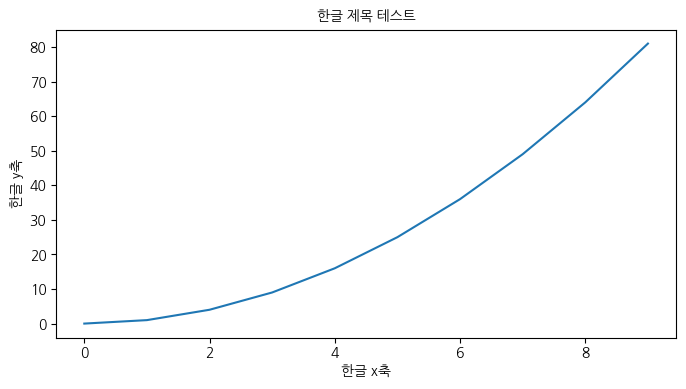

성공적으로 폰트를 적용했습니다!


In [ ]:
# 아래 코드 필요 없음.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import numpy as np

# 1. 나눔고딕 폰트 설치 (이미 있으면 건너뜀)
font_path = os.path.join(os.getcwd(), 'NanumGothic-Regular.ttf')
if not os.path.exists(font_path):
    try:
        print("나눔고딕 폰트 다운로드 중...")
        import urllib.request
        urllib.request.urlretrieve(
            "https://github.com/googlefonts/nanum-gothic/blob/main/fonts/NanumGothic-Regular.ttf?raw=true",
            font_path
        )
        print(f"폰트 다운로드 완료: {font_path}")
    except Exception as e:
        print(f"폰트 다운로드 실패: {e}")

# 2. 폰트 등록 (FontProperties 객체 생성)
if os.path.exists(font_path):
    # 폰트 프로퍼티 객체 생성
    font_prop = fm.FontProperties(fname=font_path)

    # 3. 폰트 직접 지정 방식으로 변경
    plt.figure(figsize=(8, 4))
    plt.title('한글 제목 테스트', fontproperties=font_prop)
    plt.plot(np.arange(10), np.arange(10)**2)
    plt.xlabel('한글 x축', fontproperties=font_prop)
    plt.ylabel('한글 y축', fontproperties=font_prop)

    # 모든 텍스트에 폰트 적용 (tick 레이블 등)
    for text in plt.gca().get_children():
        if hasattr(text, 'set_fontproperties'):
            text.set_fontproperties(font_prop)

    plt.show()

    print("성공적으로 폰트를 적용했습니다!")
else:
    print(f"폰트 파일을 찾을 수 없습니다: {font_path}")

Saving renew_iptv_sampled_data.csv to renew_iptv_sampled_data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ContractPVCName                            50000 non-null  object 
 1   ResidenceBuildingTypeCode                  50000 non-null  object 
 2   MonthlyDeviceNumber                        32947 non-null  float32
 3   TotalOctetReceived                         32947 non-null  float32
 4   TotalOctetTransmitted                      32947 non-null  float32
 5   Gender                                     50000 non-null  object 
 6   ReAgreementYesNo                           42648 non-null  object 
 7   TransferYesNo                              50000 non-null  object 
 8   WifiSubscriptionYesNo                      41903 non-null  object 
 9   MobilePackageYesNo          

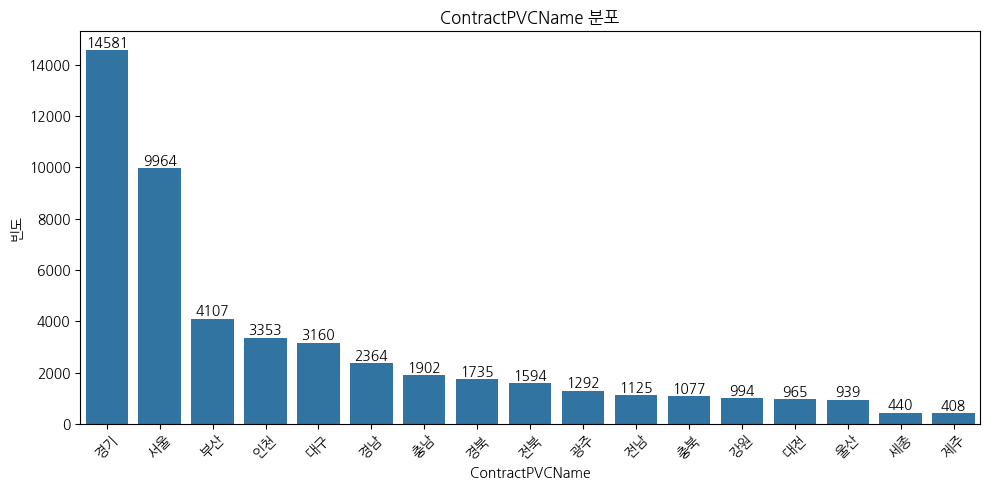

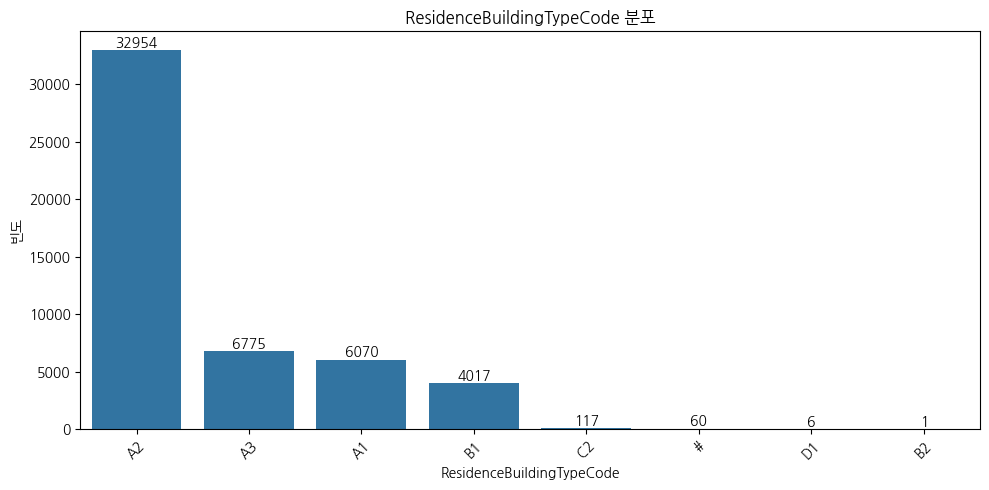

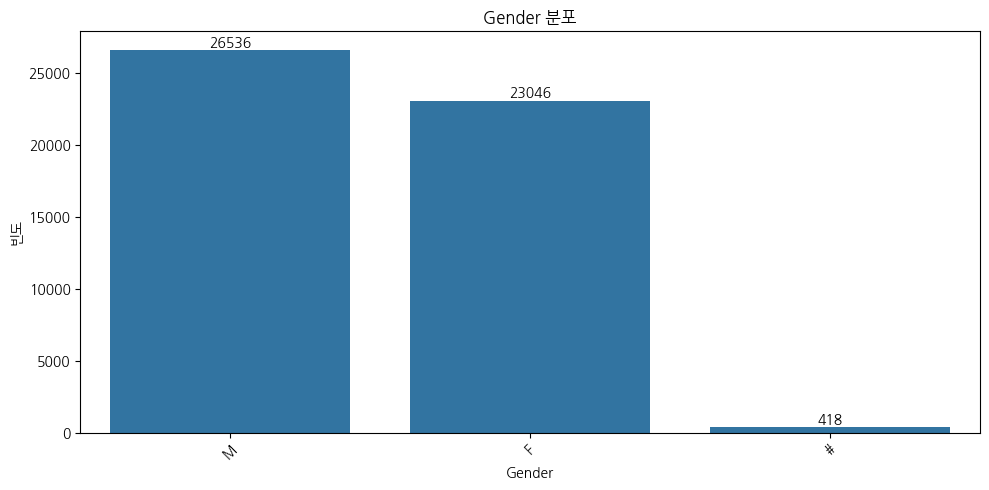

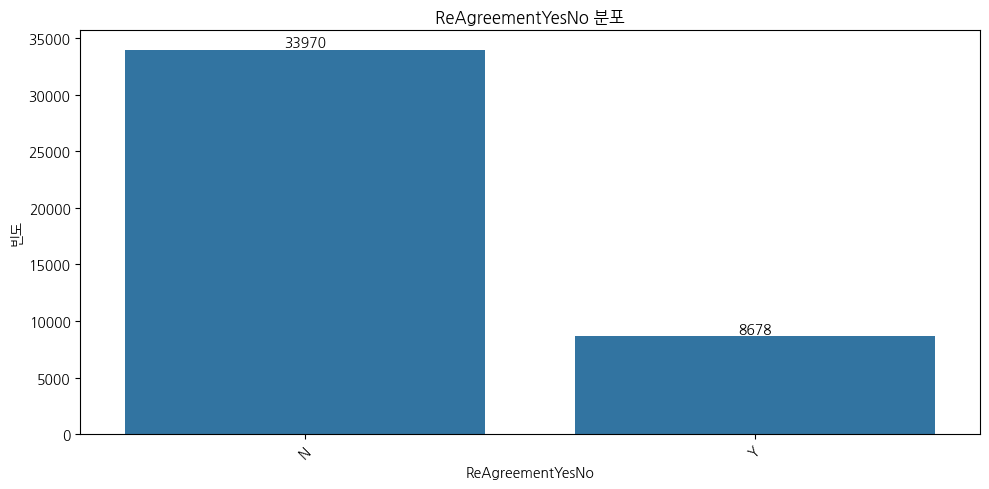

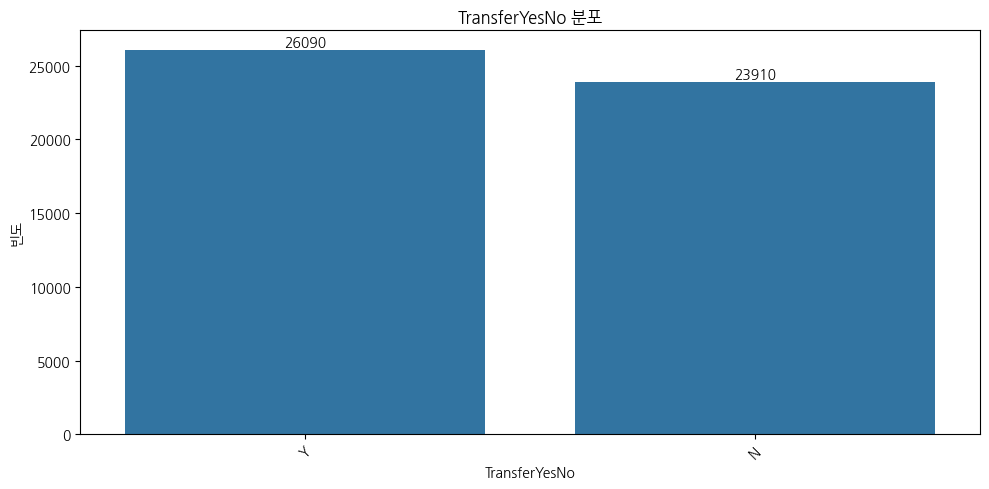

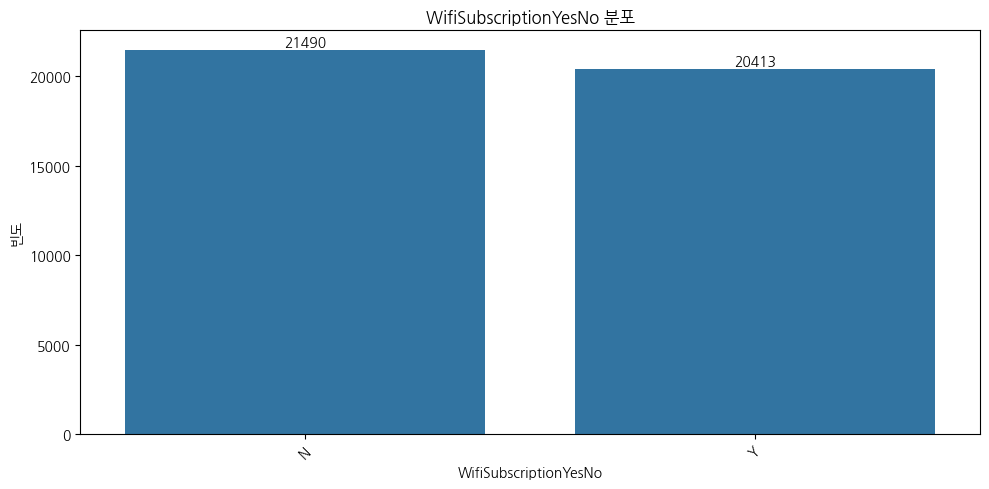

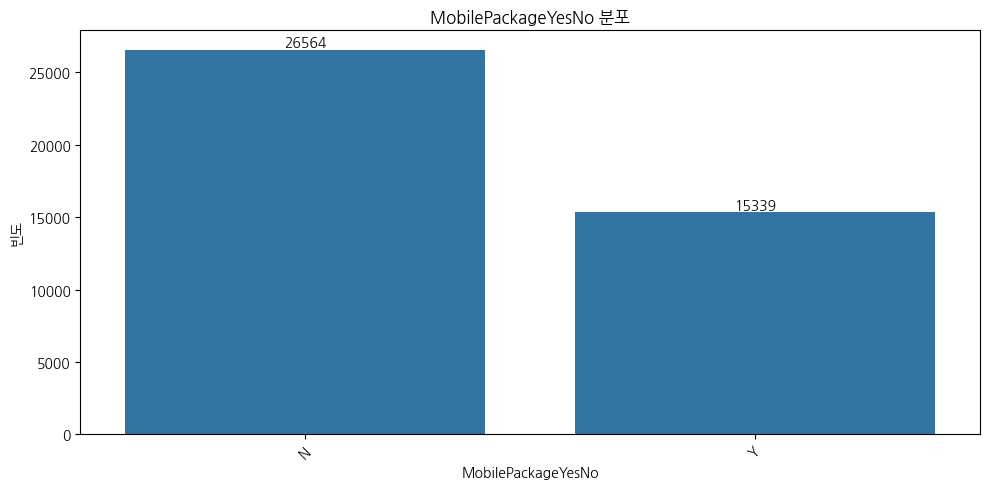

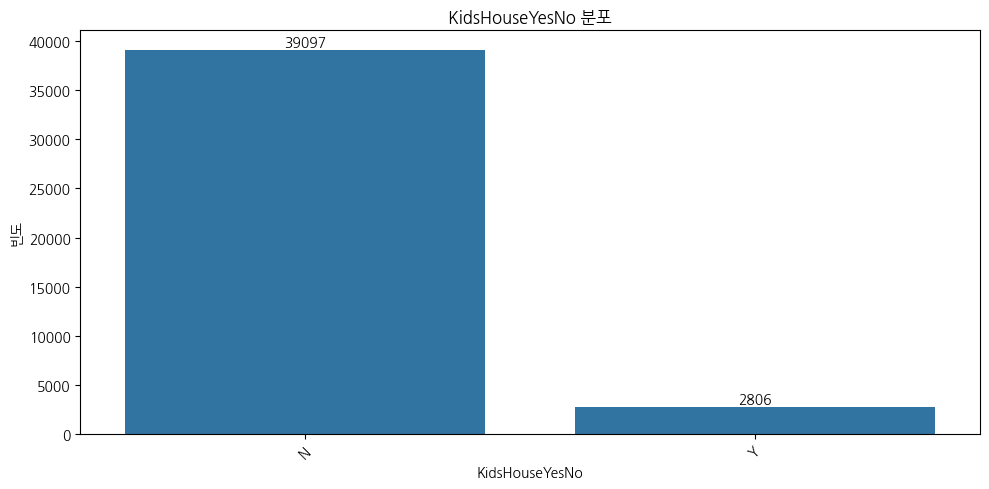

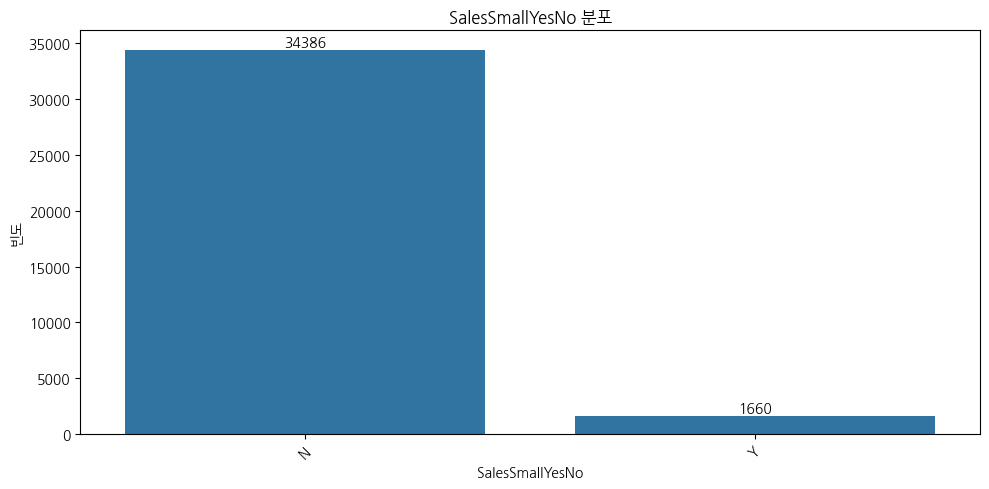

/usr/local/lib/python3.11/dist-packages/cudf/core/indexed_frame.py:3628: UserWarning: GPU-accelerated mergesort is currently not supported, defaulting to quicksort.
  warnings.warn(


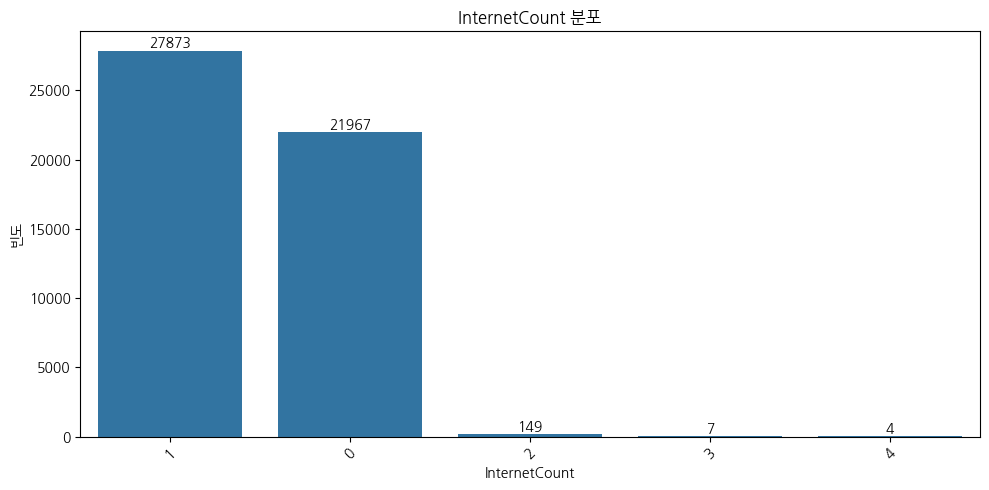

/usr/local/lib/python3.11/dist-packages/cudf/core/indexed_frame.py:3628: UserWarning: GPU-accelerated mergesort is currently not supported, defaulting to quicksort.
  warnings.warn(


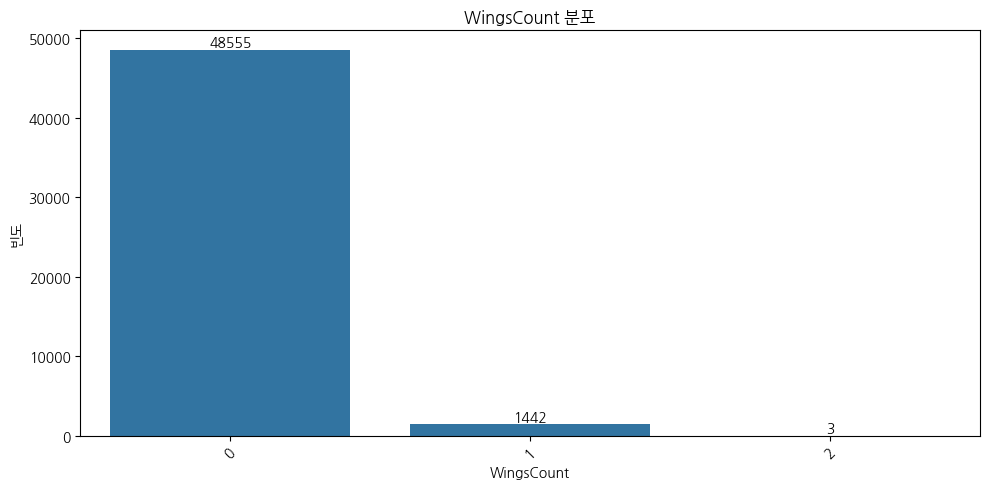

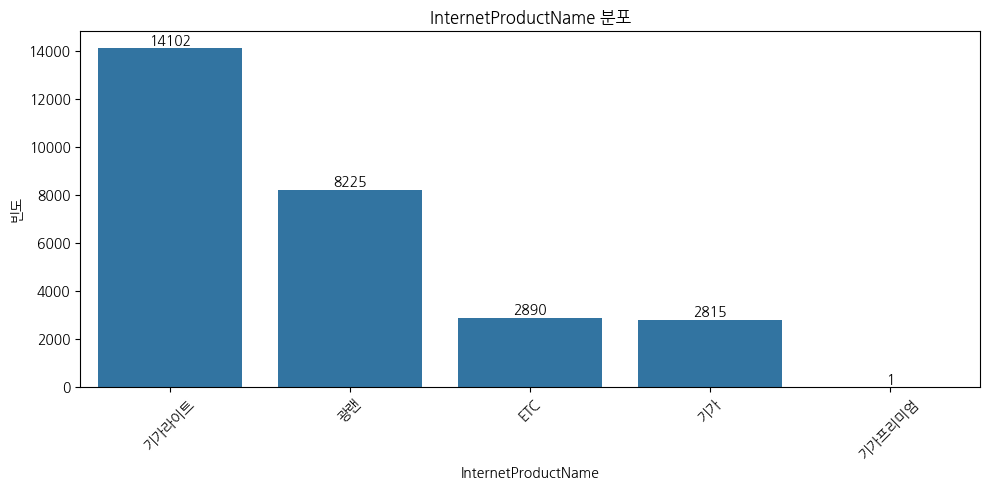

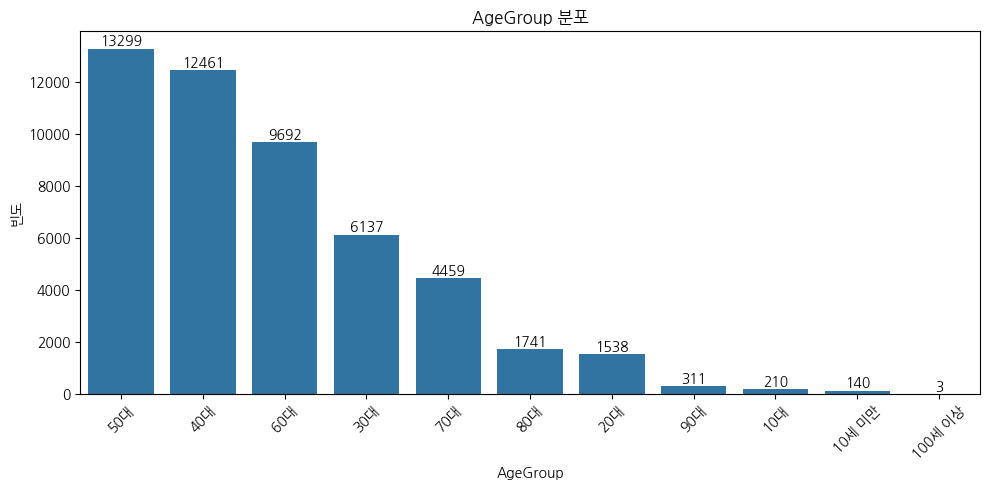

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 파일 업로드 (Colab에서 로컬 파일 업로드)
uploaded = files.upload()  # 파일 업로드 창 열기

# 데이터 로드 (파일 이름 자동 처리)
file_name = list(uploaded.keys())[0]  # 업로드된 첫 번째 파일 이름 가져오기
try:
    df = pd.read_csv(file_name, encoding='cp949')  # CP949로 파일 읽기
except UnicodeDecodeError:
    import chardet
    with open(file_name, 'rb') as f:
        result = chardet.detect(f.read(10000))
        detected_encoding = result['encoding']
    df = pd.read_csv(file_name, encoding=detected_encoding)

# 데이터 타입 최적화 (메모리 사용량 줄이기)
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype('float32')
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype('int32')

# 기본 정보 확인
print(df.info())
print(df.describe())
print(df.isnull().sum())

# 범주형 변수 분포 확인
categorical_cols = [
    'ContractPVCName',
    'ResidenceBuildingTypeCode',
    'Gender',
    'ReAgreementYesNo',
    'TransferYesNo',
    'WifiSubscriptionYesNo',
    'MobilePackageYesNo',
    'KidsHouseYesNo',
    'SalesSmallYesNo',
    'InternetCount',
    'WingsCount',
    'InternetProductName',
    'AgeGroup'
]

for col in categorical_cols:
    plt.figure(figsize=(10, 5))

    # 그래프 생성
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)

    # 값 표시 (막대 위에 빈도 추가)
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',  # 빈도 값
            (p.get_x() + p.get_width() / 2., p.get_height()),  # 위치 설정
            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
            textcoords='offset points'
        )

    # 그래프 제목 및 축 레이블 설정
    plt.title(f'{col} 분포')
    plt.xlabel(col)
    plt.ylabel('빈도')

    # x축 라벨 회전 (필요시)
    plt.xticks(rotation=45)

    # 레이아웃 조정
    plt.tight_layout()

    # 그래프 출력
    plt.show()

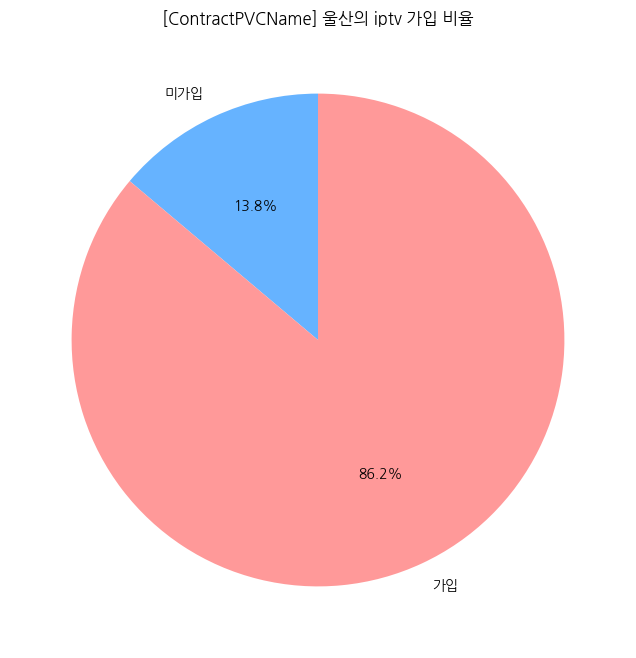

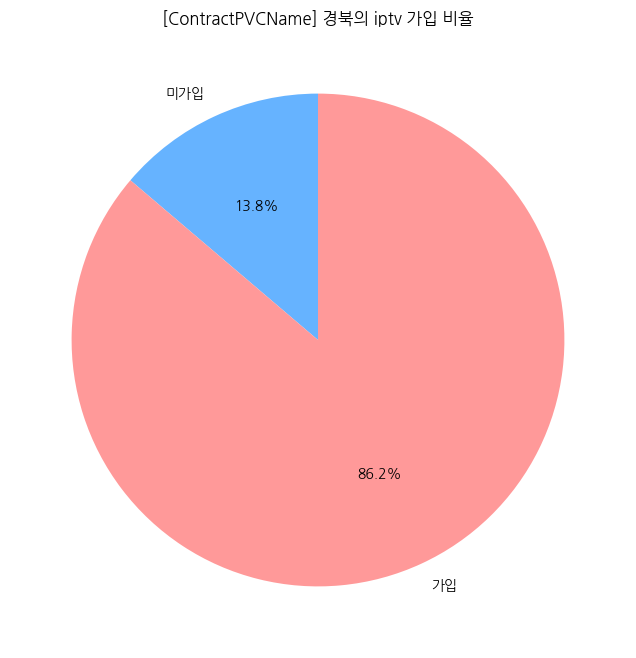

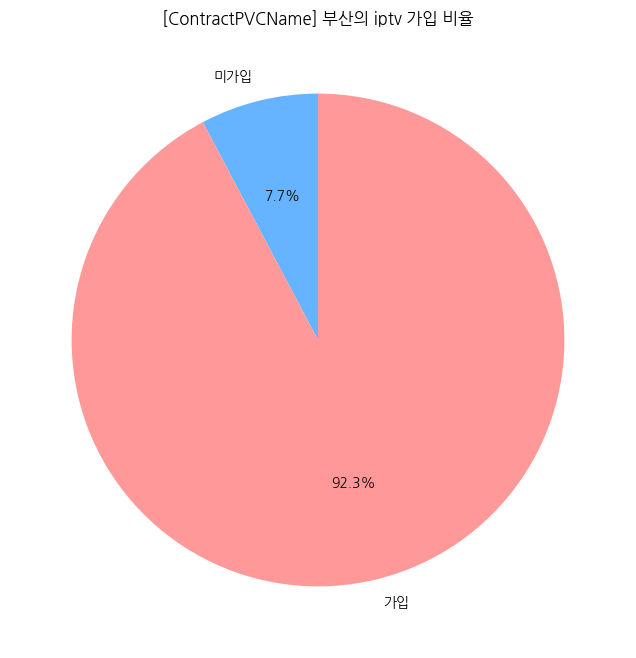

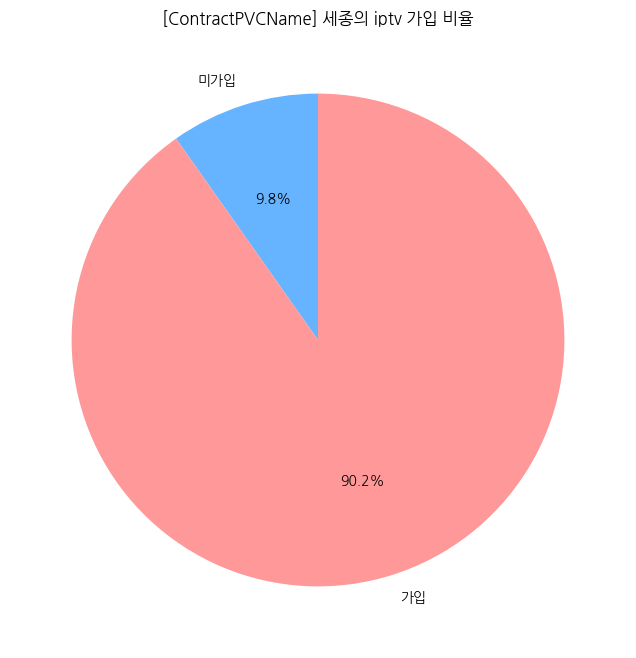

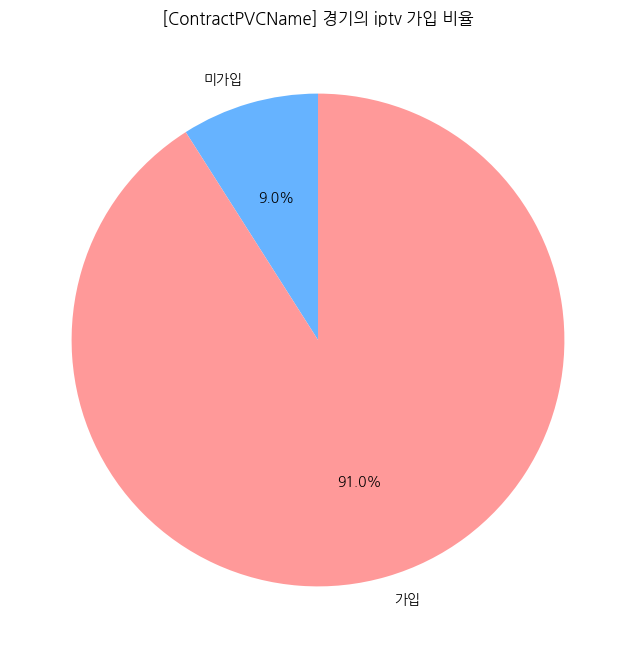

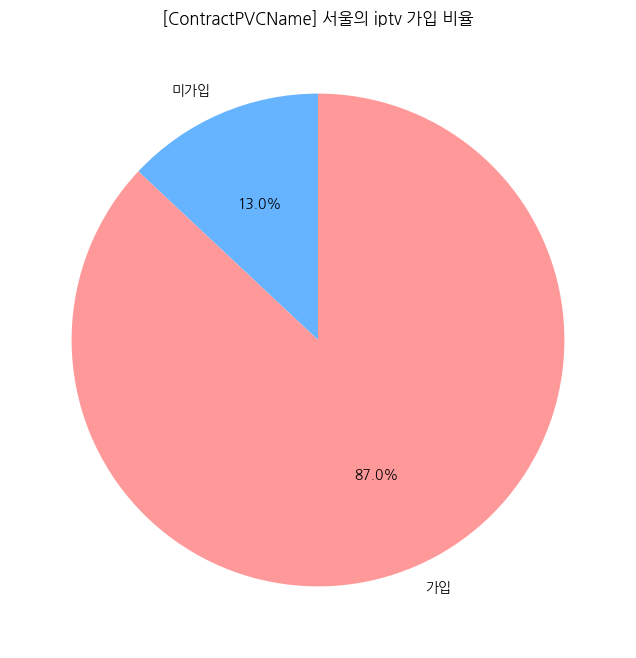

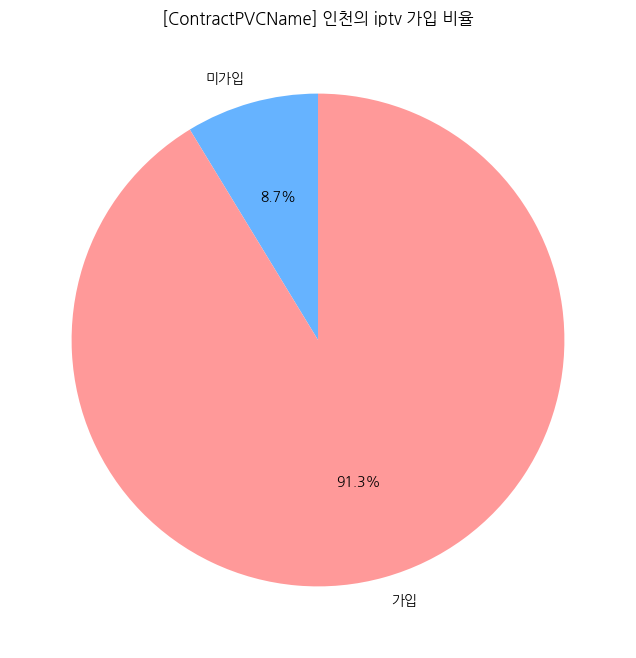

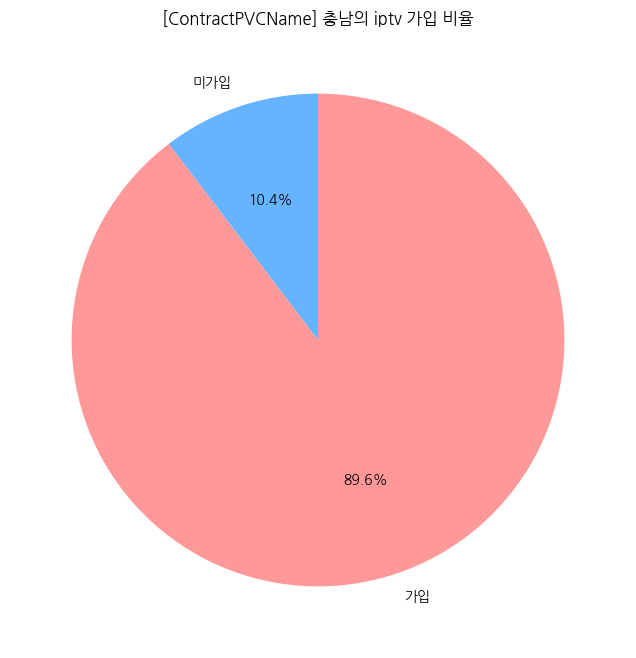

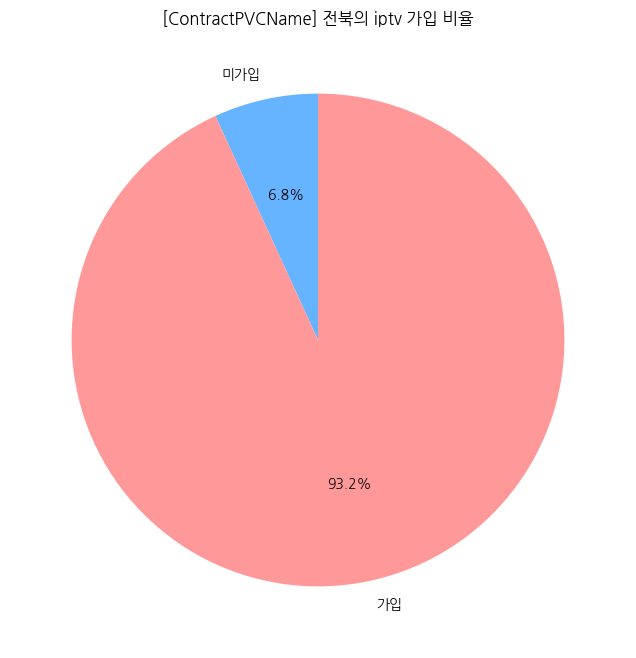

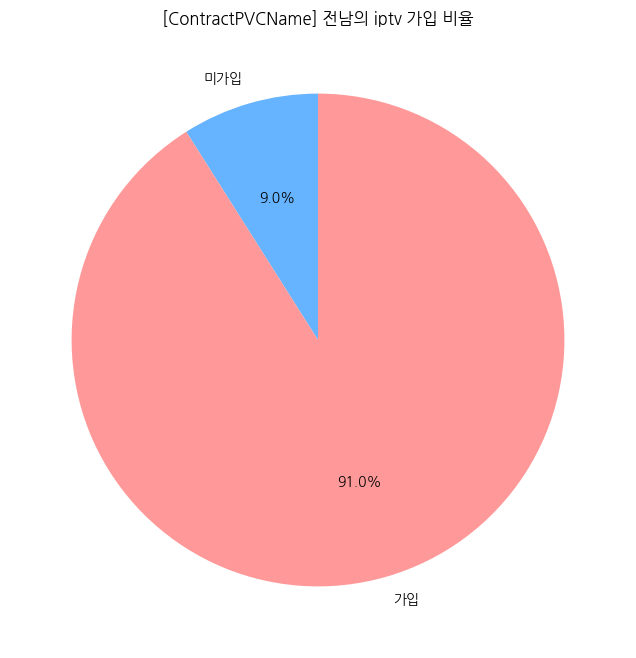

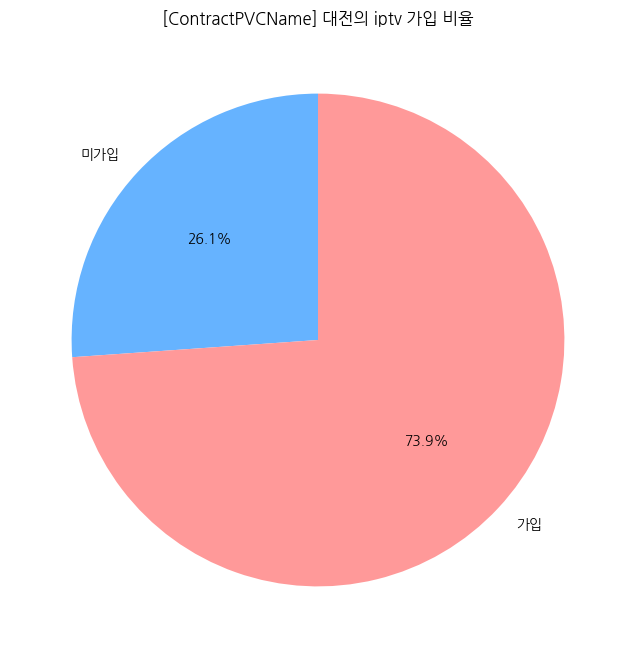

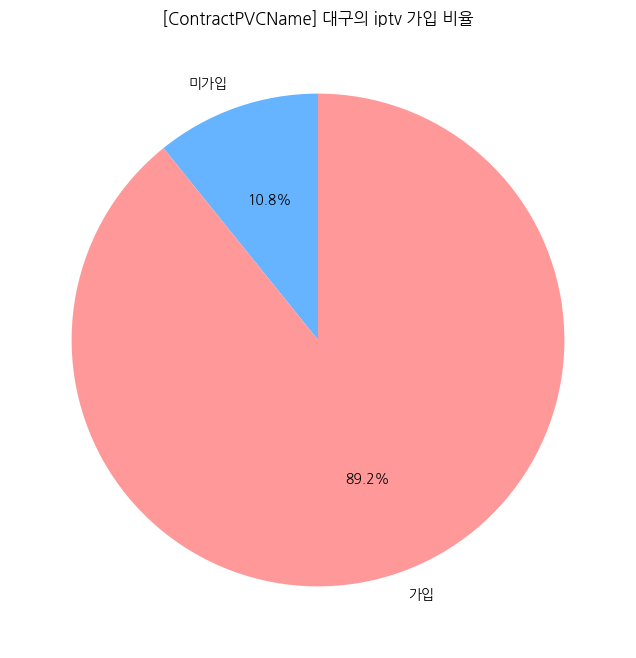

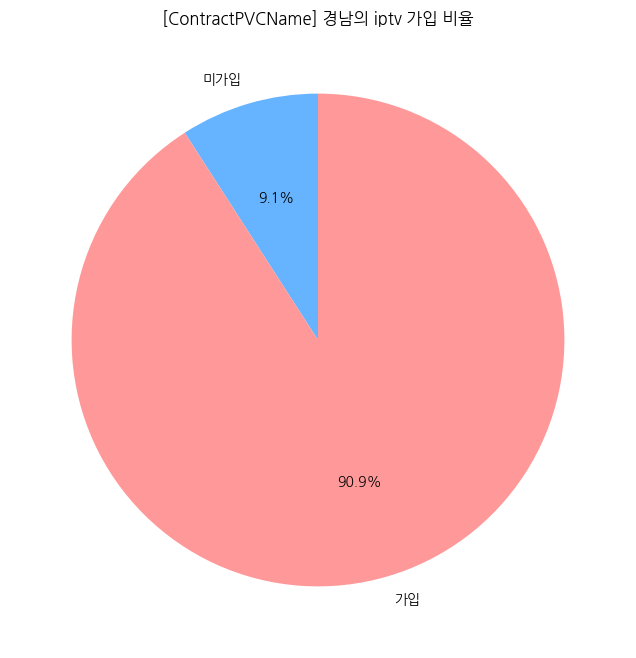

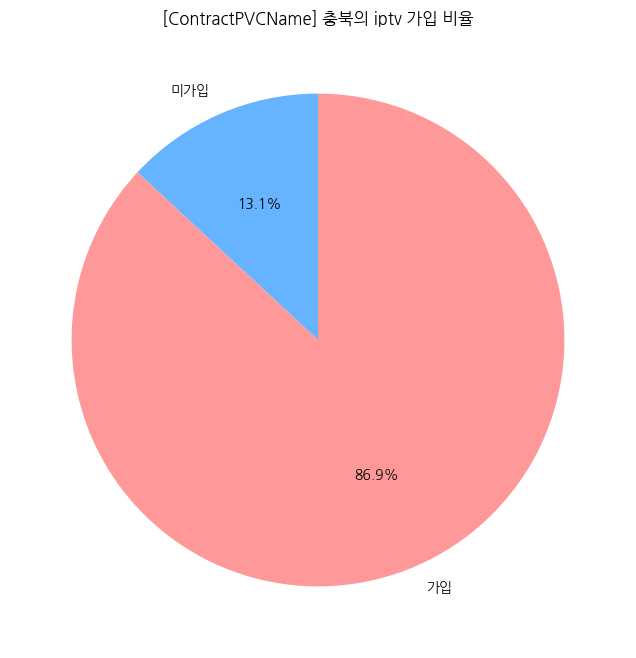

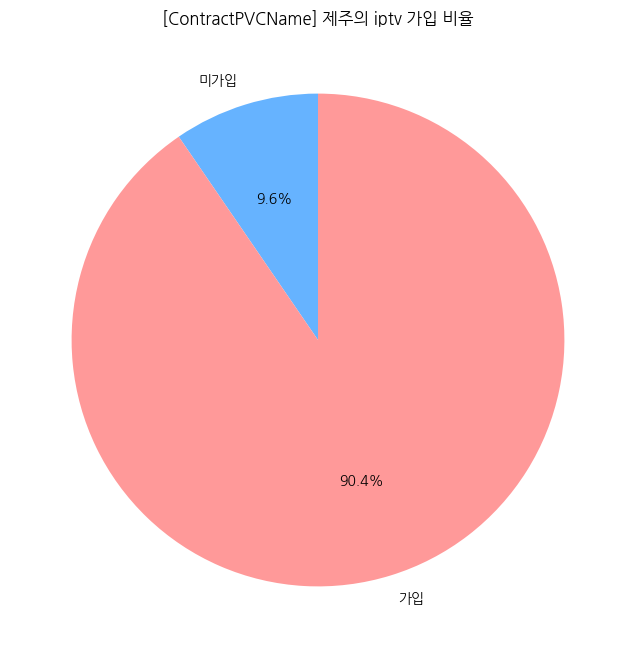

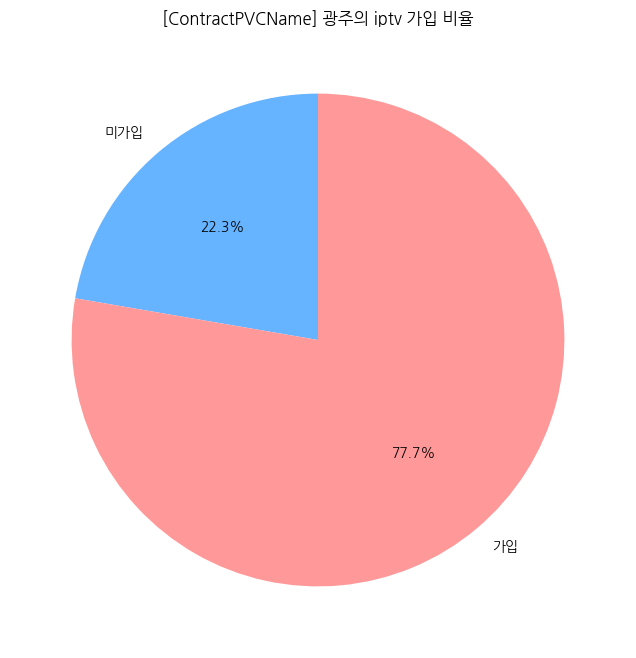

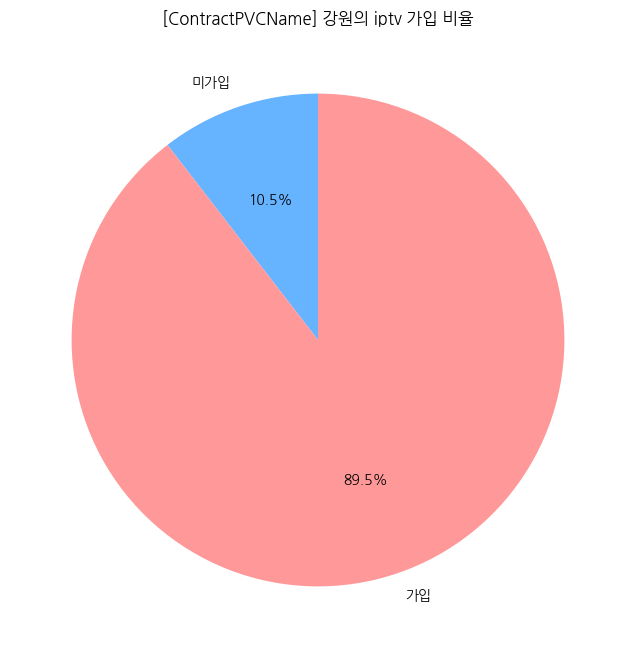

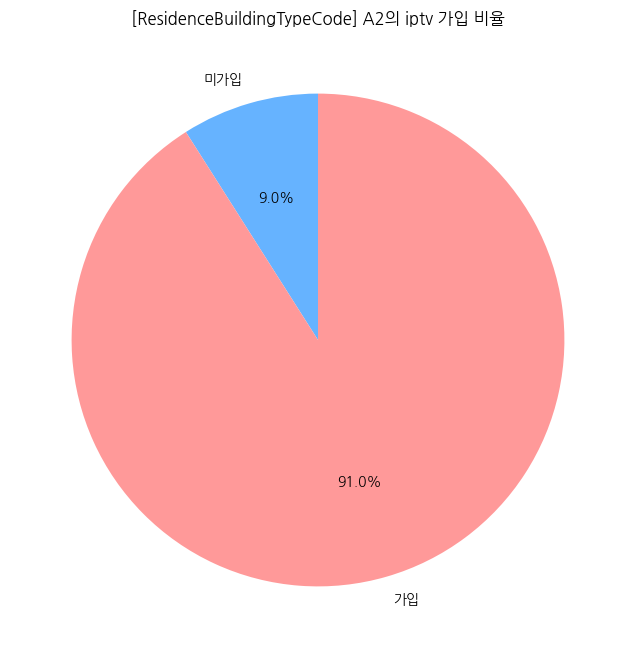

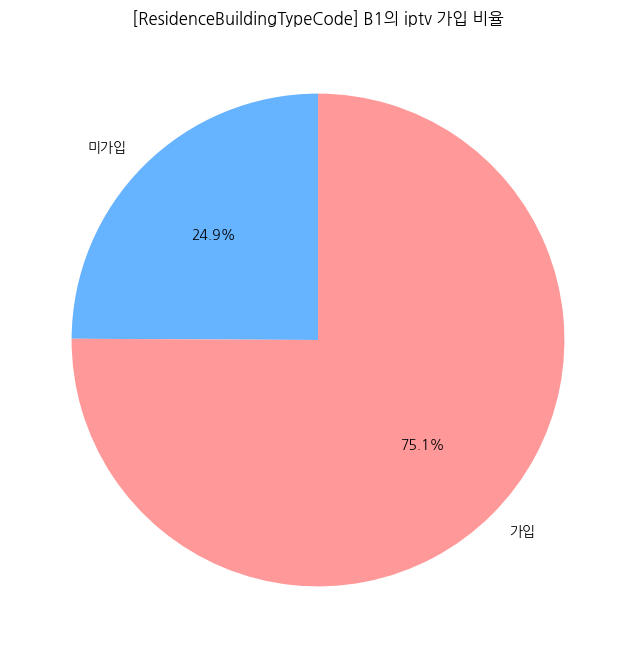

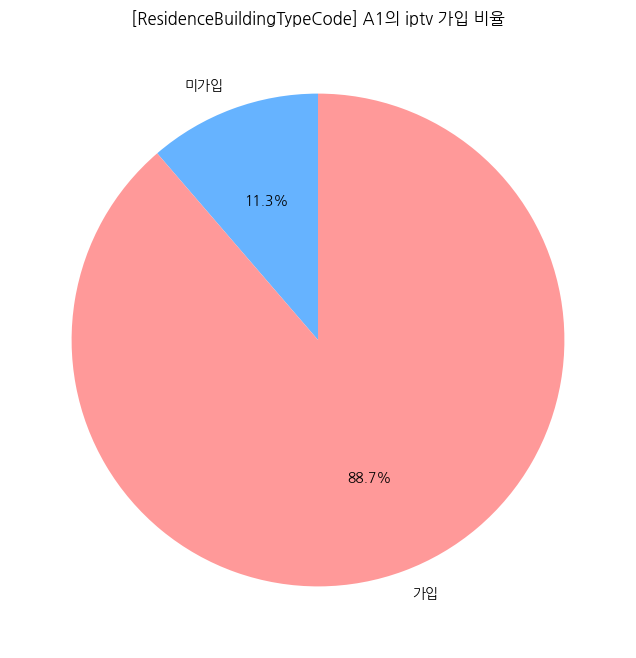

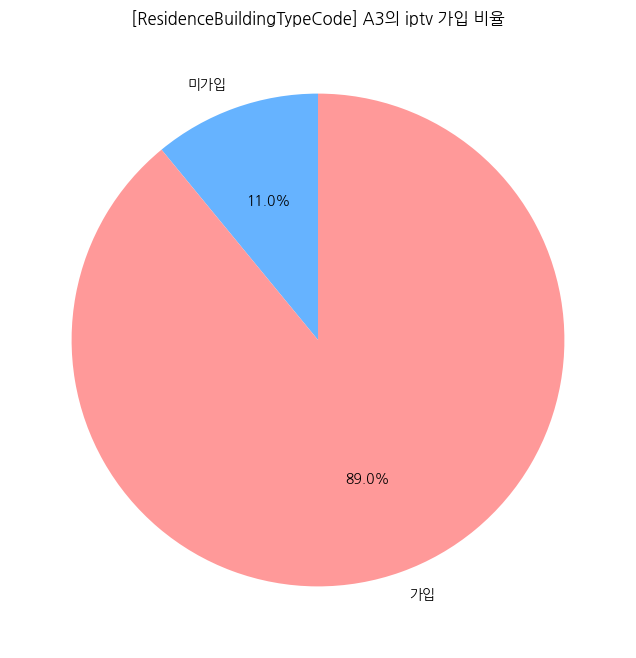

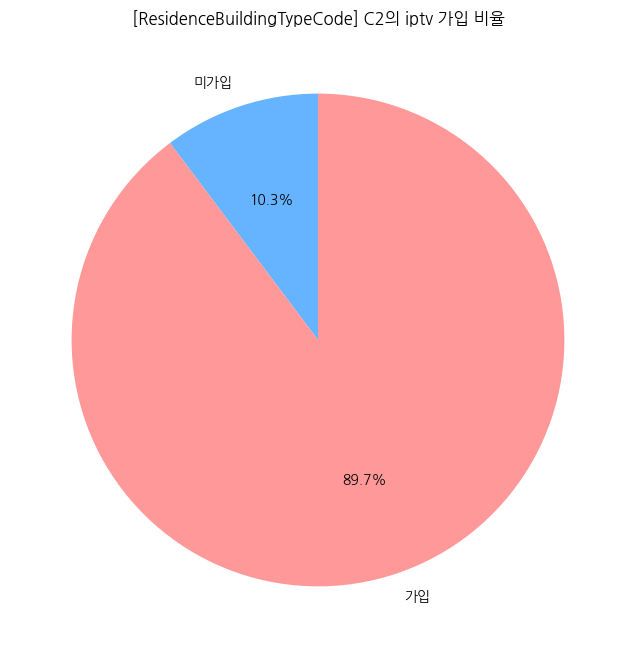

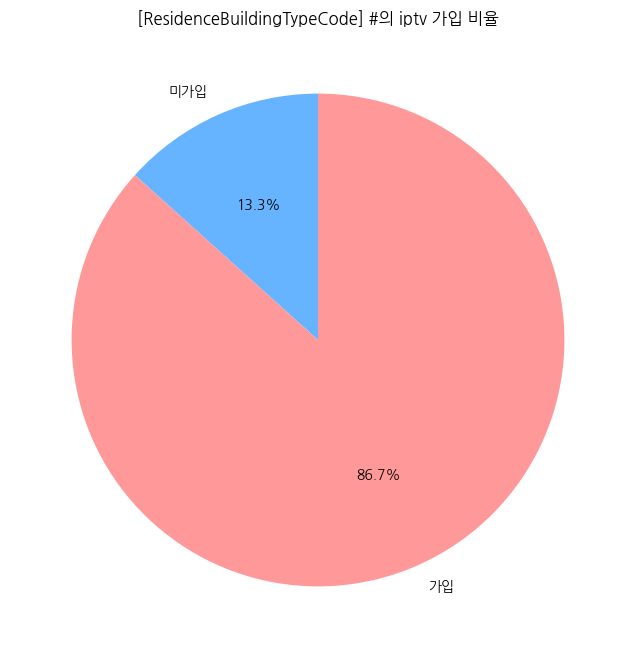

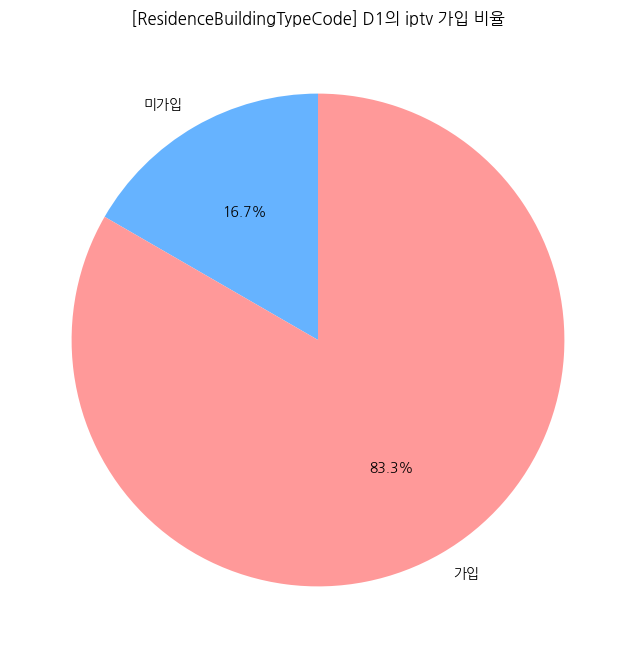

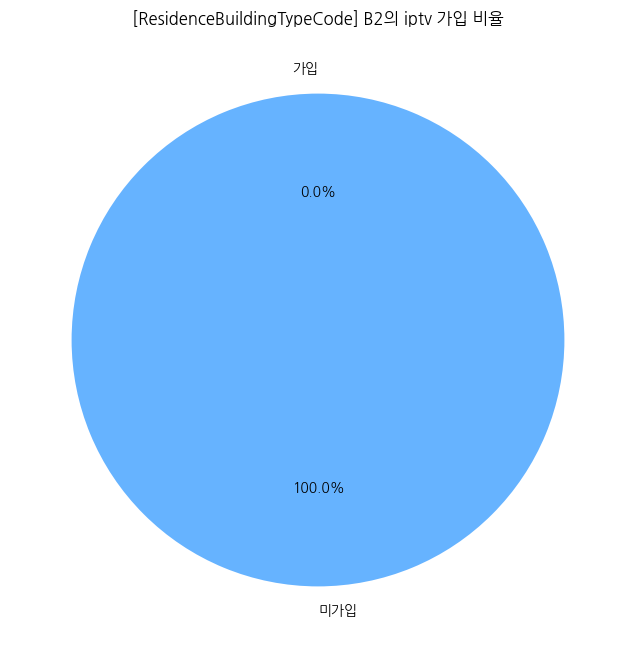

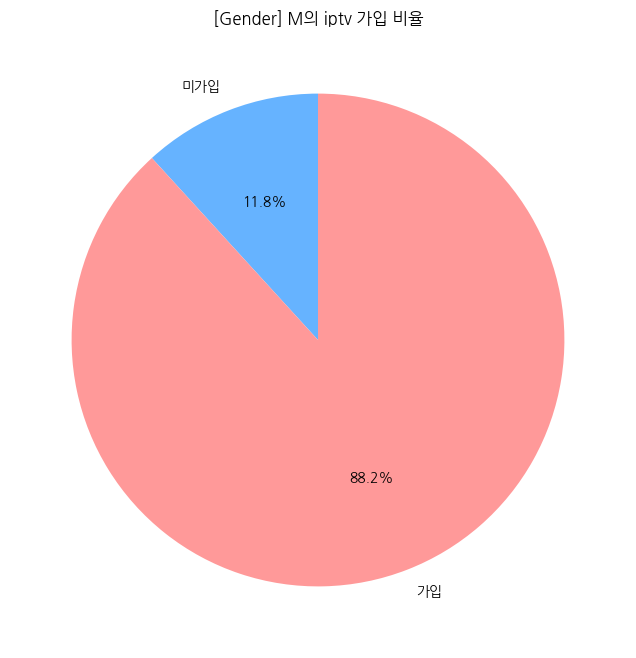

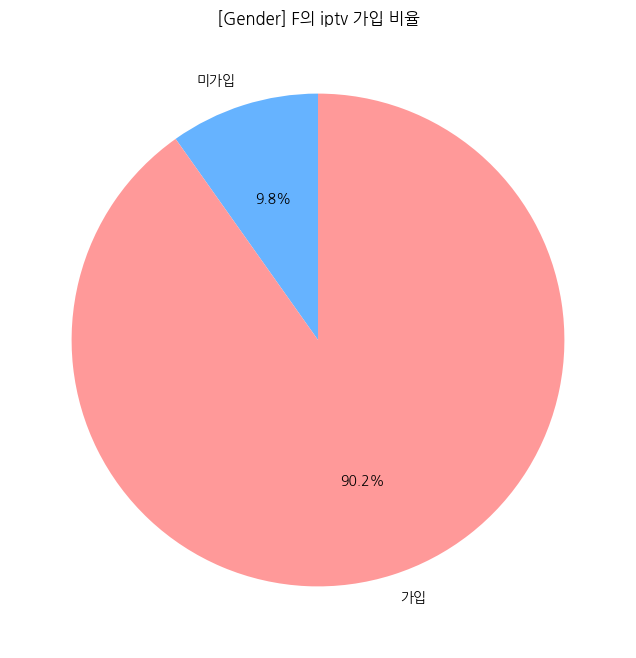

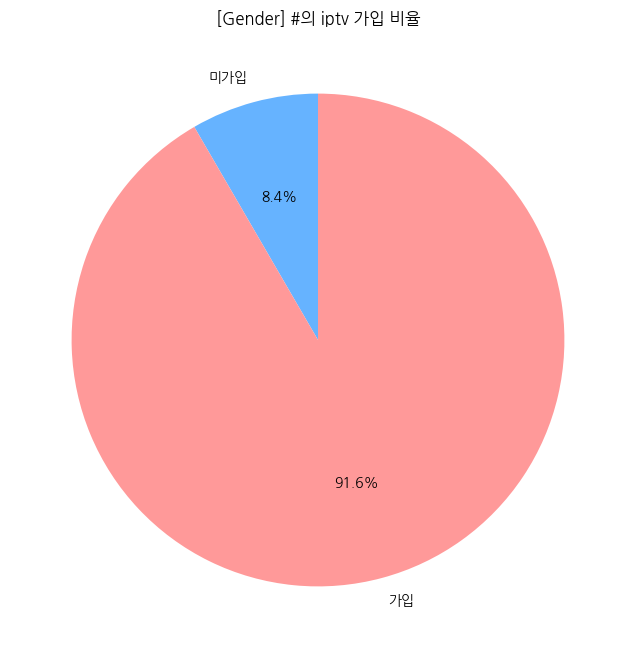

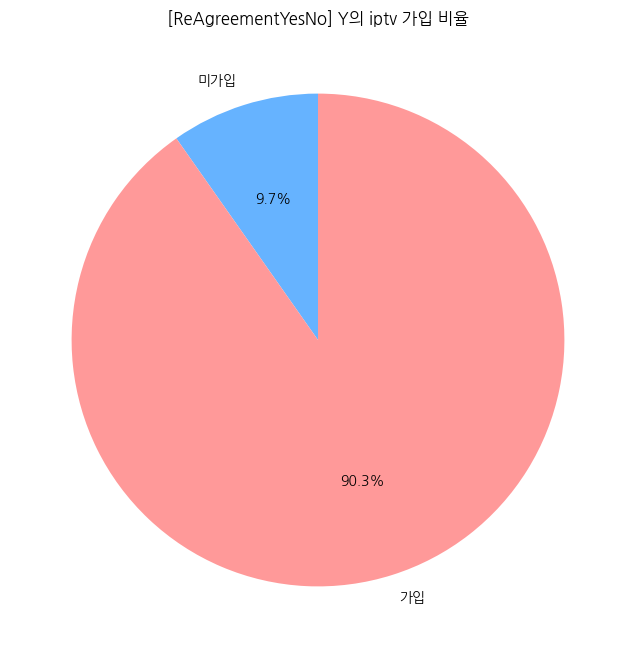

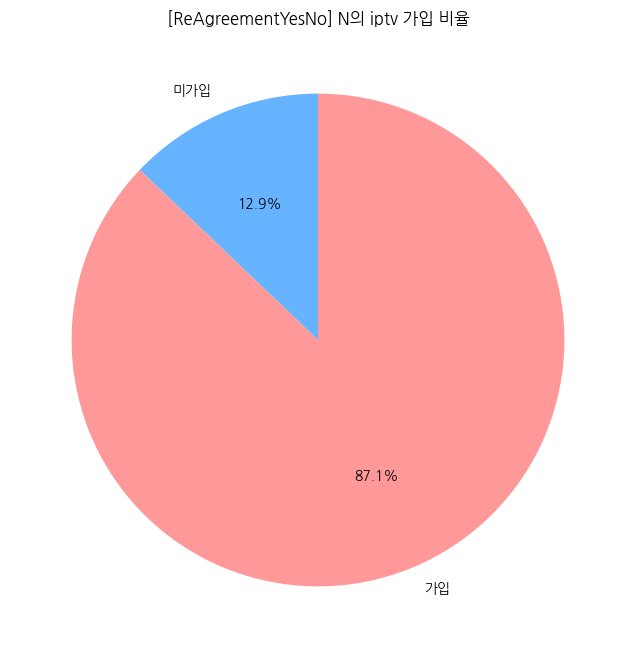

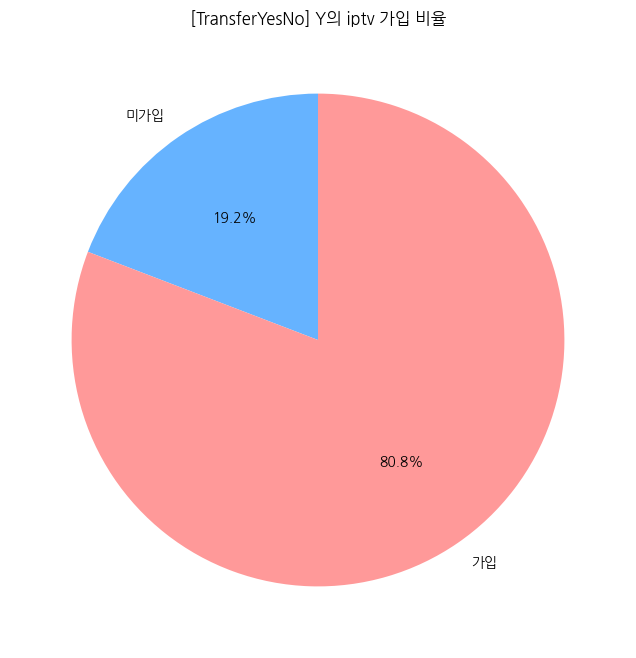

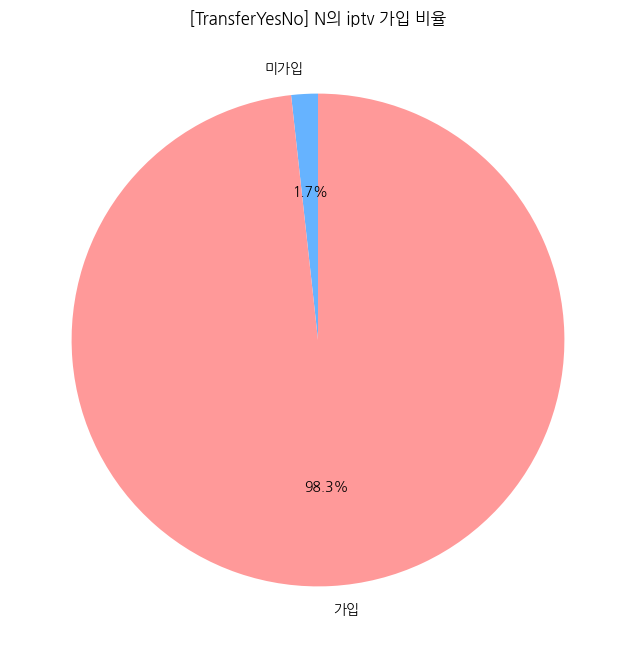

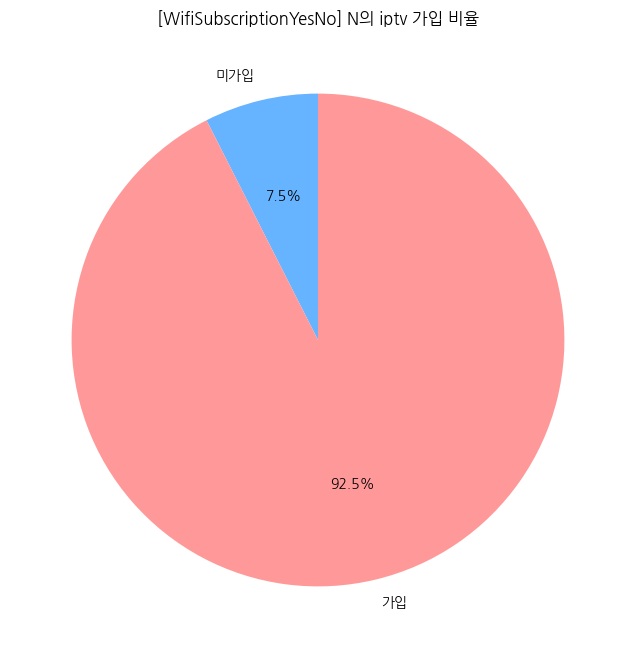

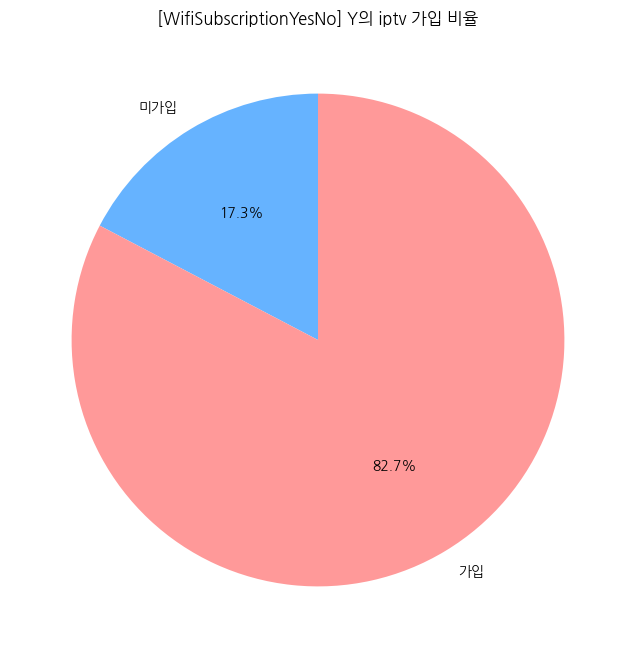

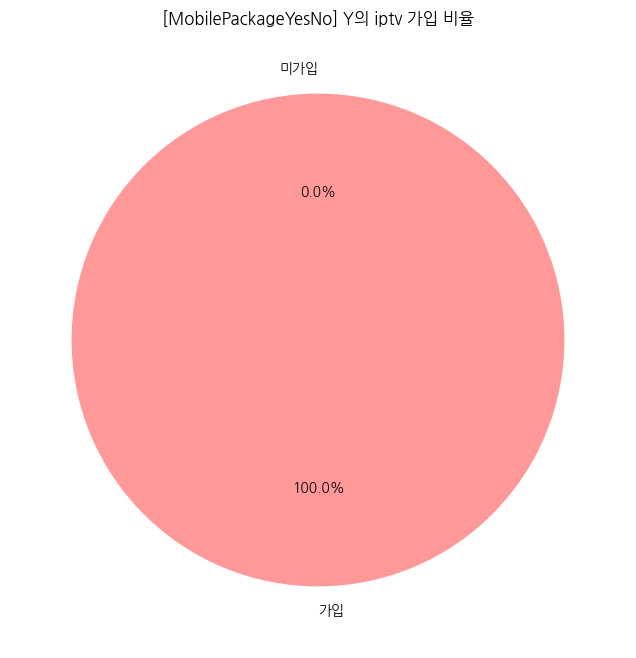

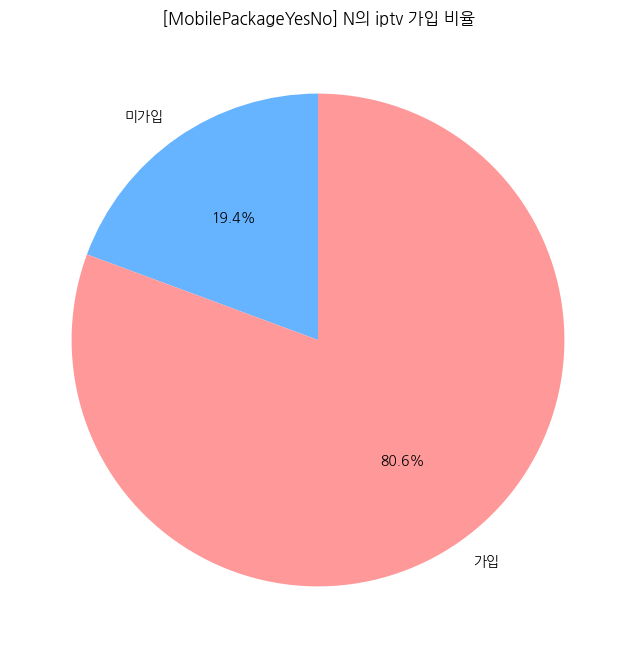

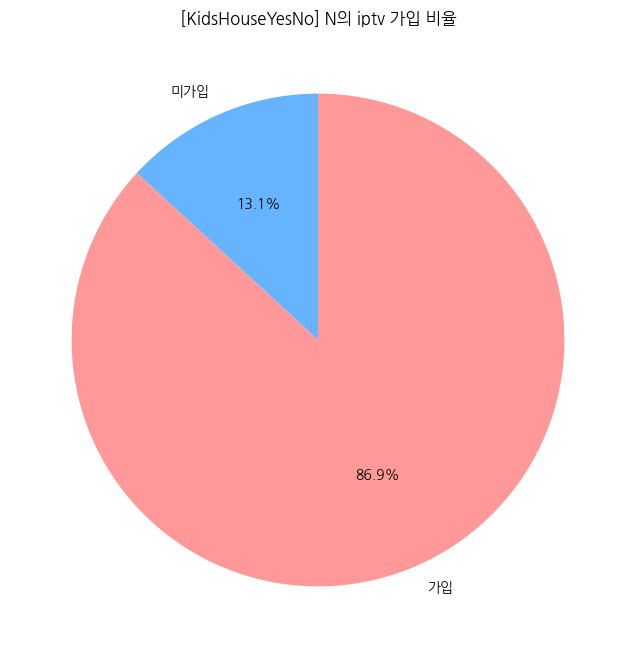

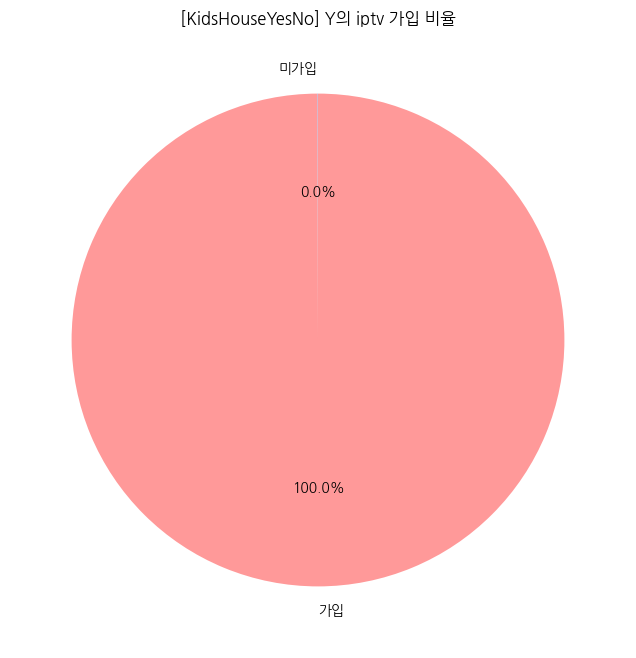

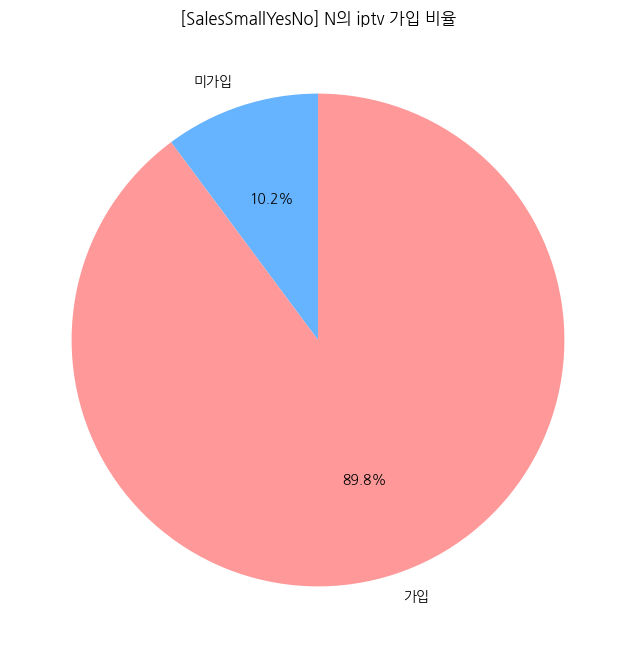

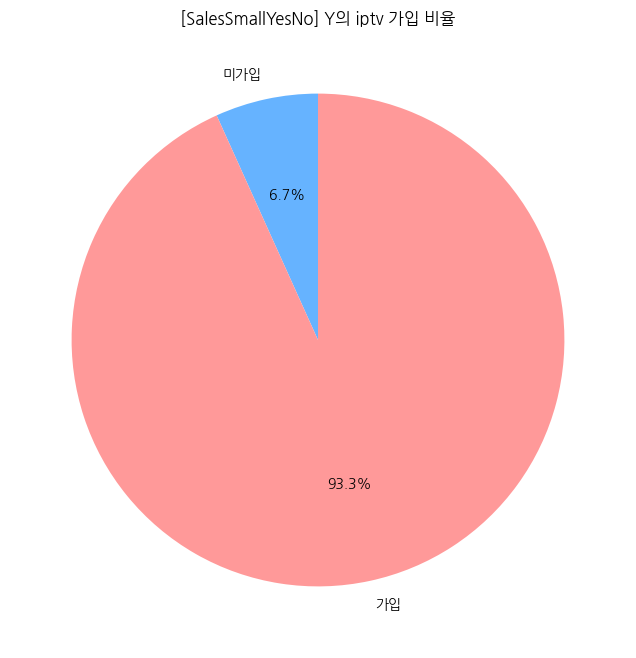

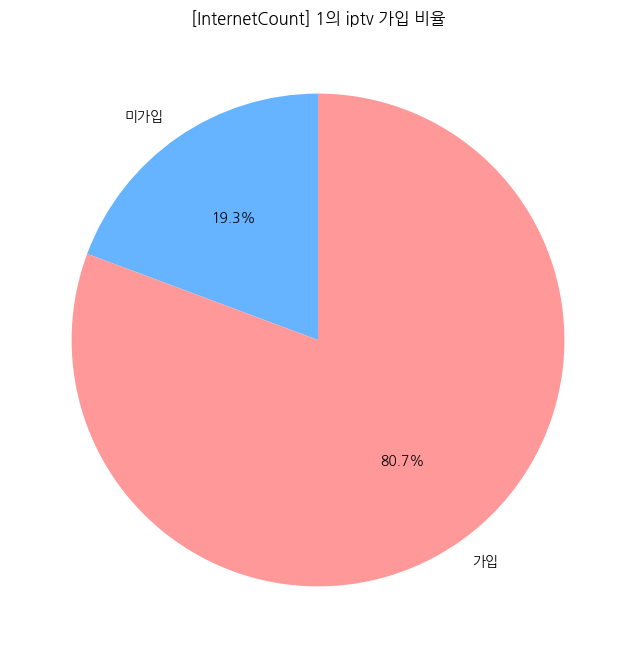

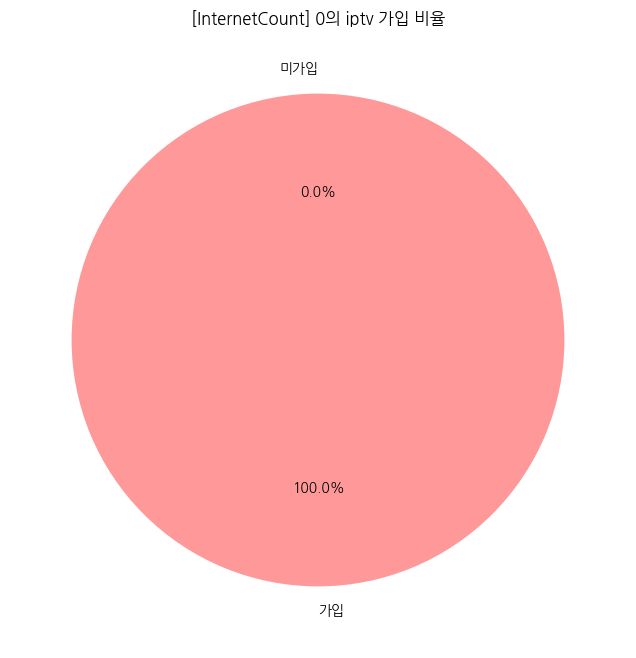

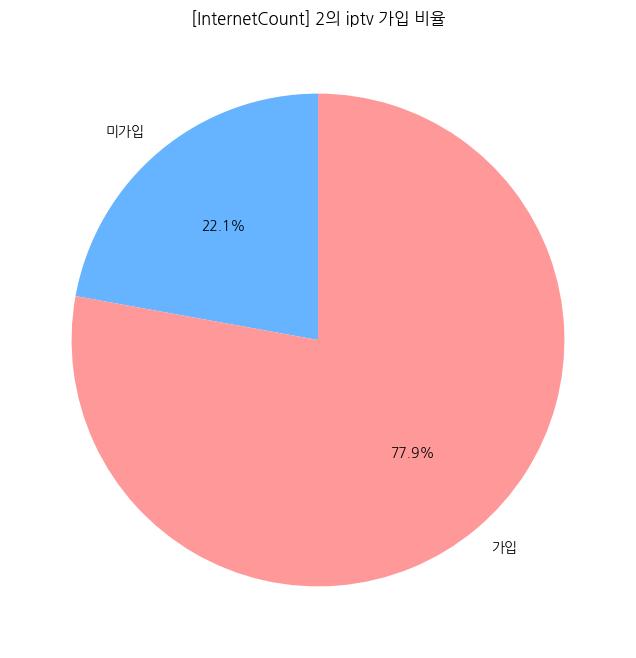

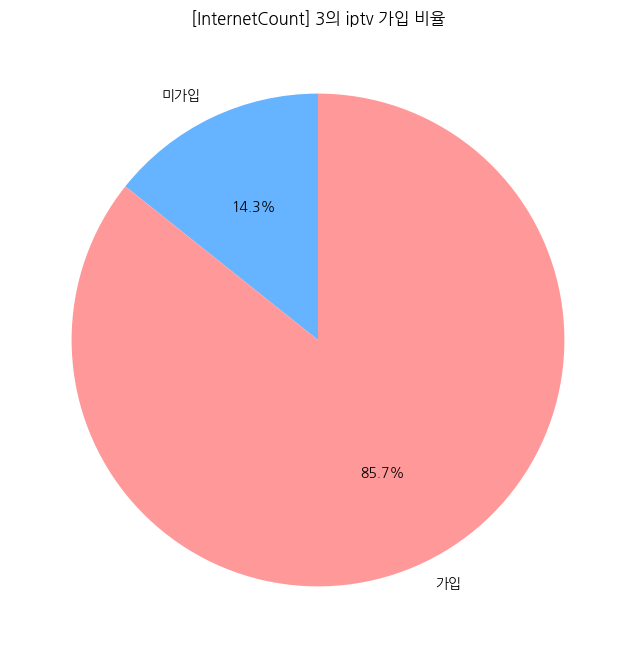

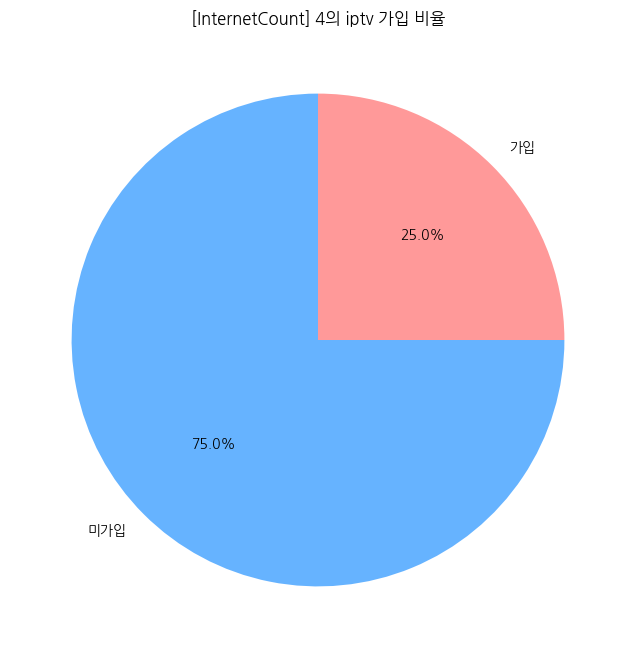

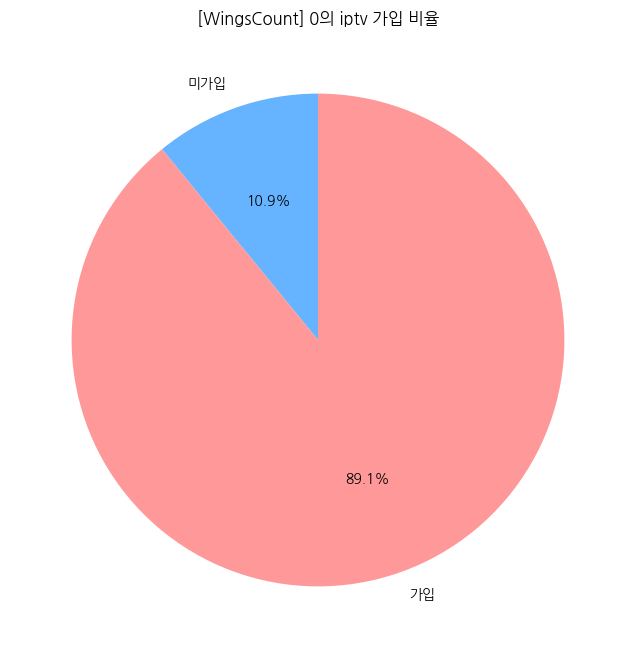

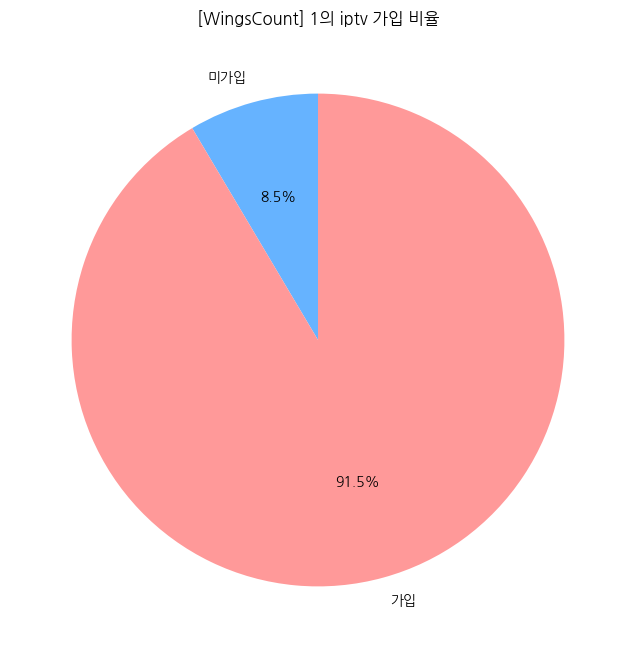

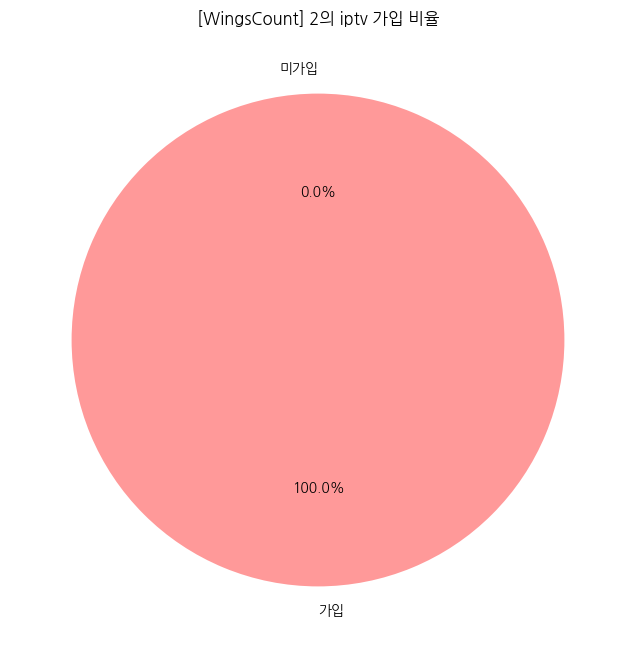

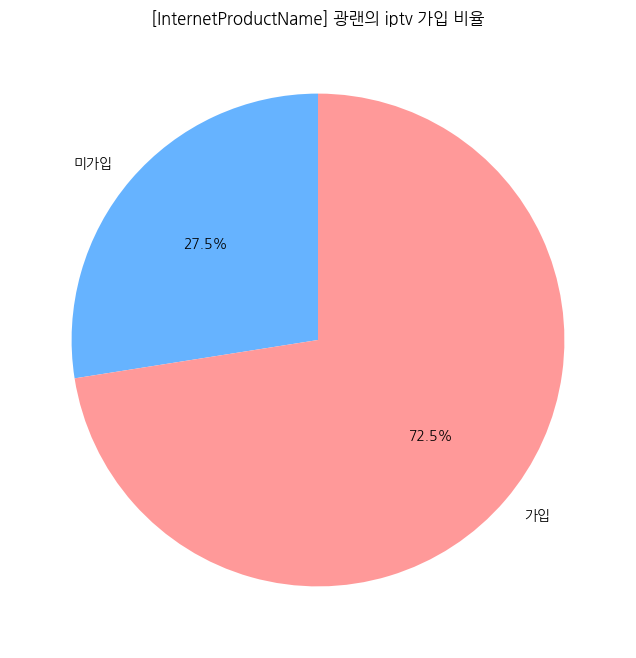

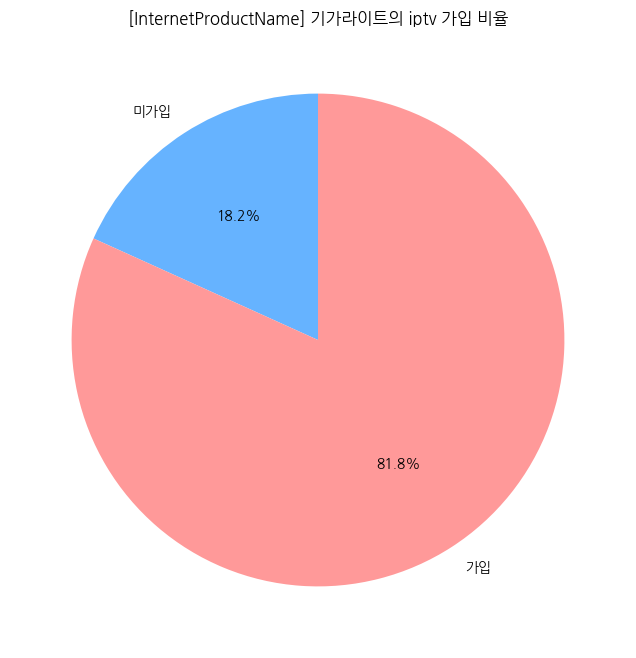

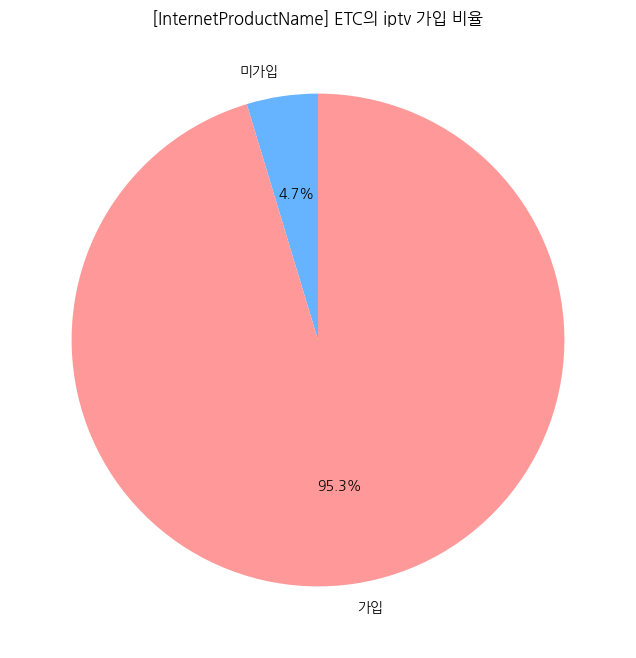

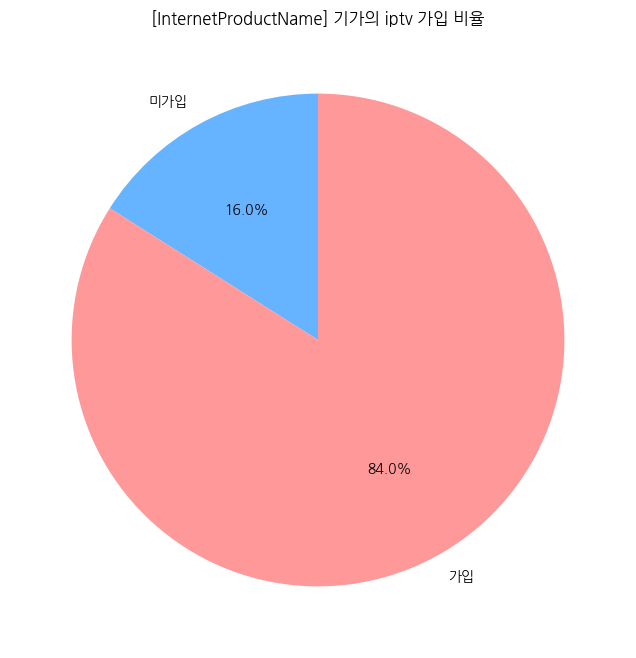

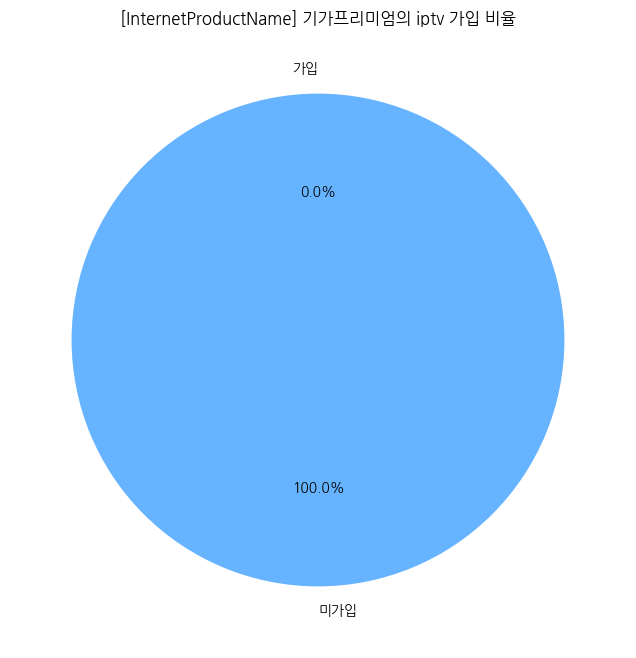

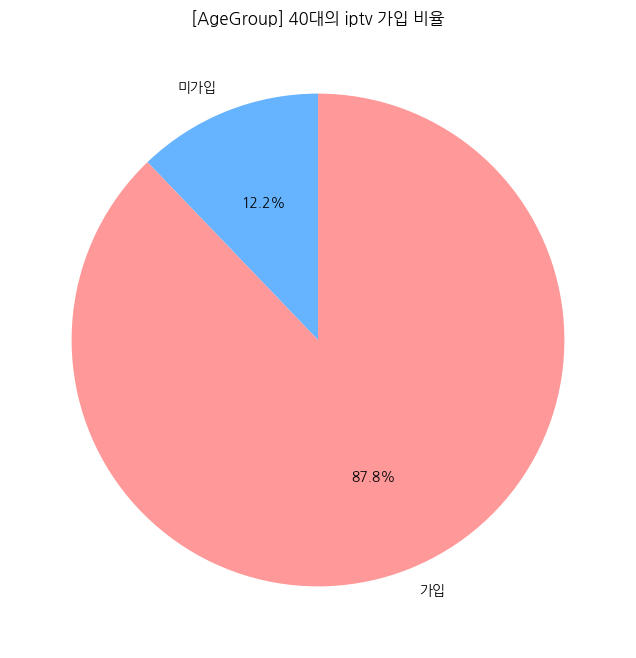

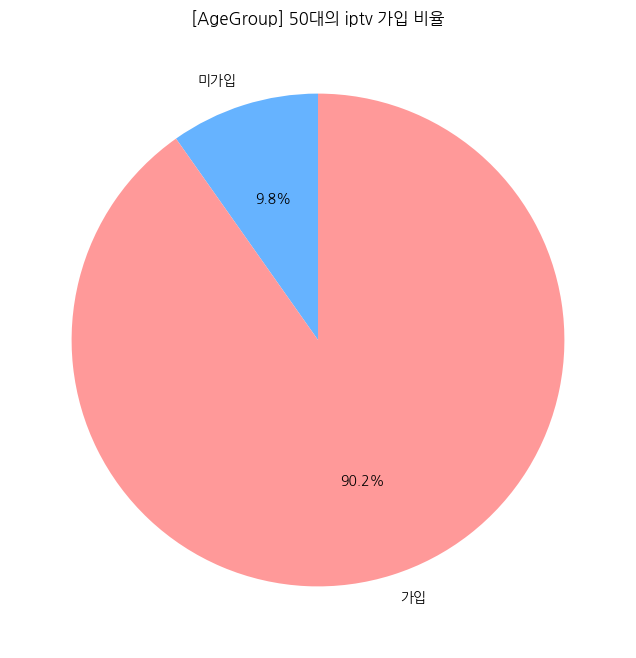

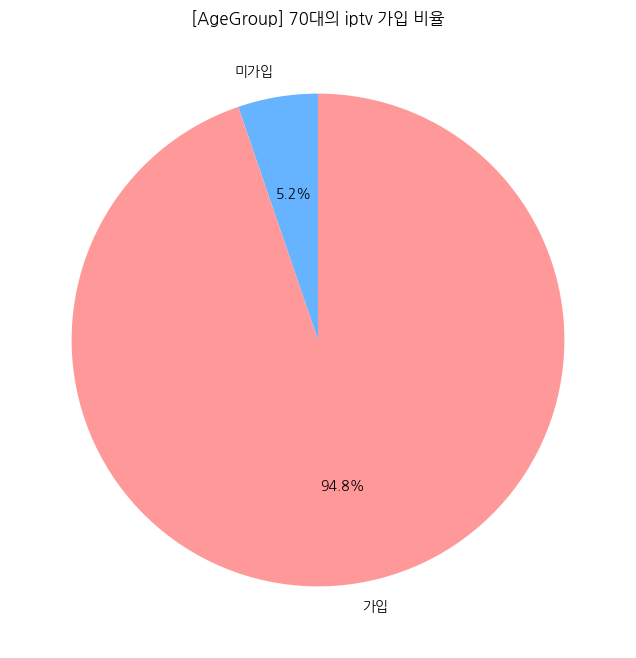

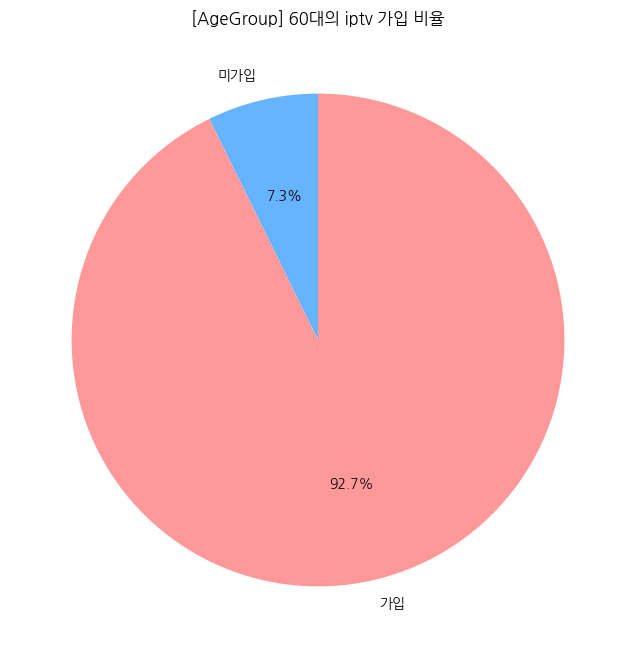

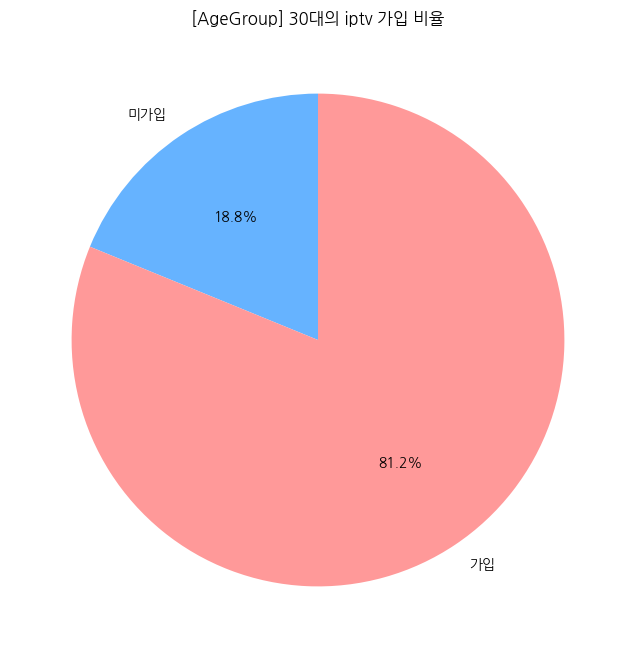

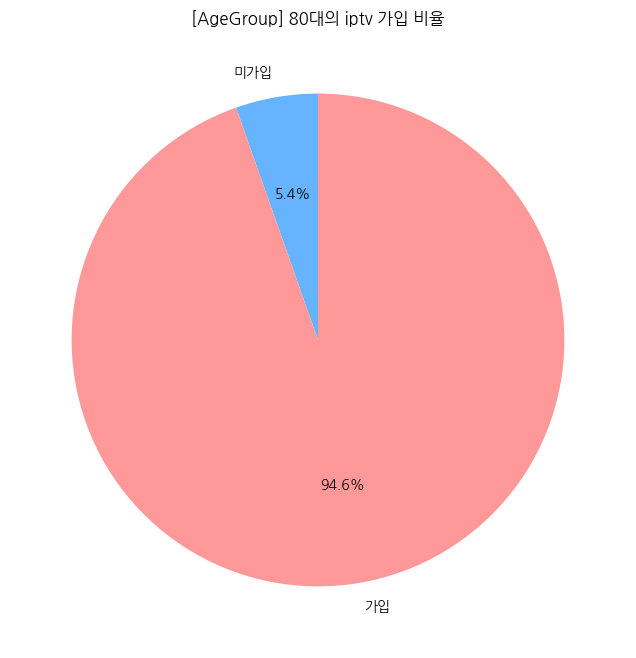

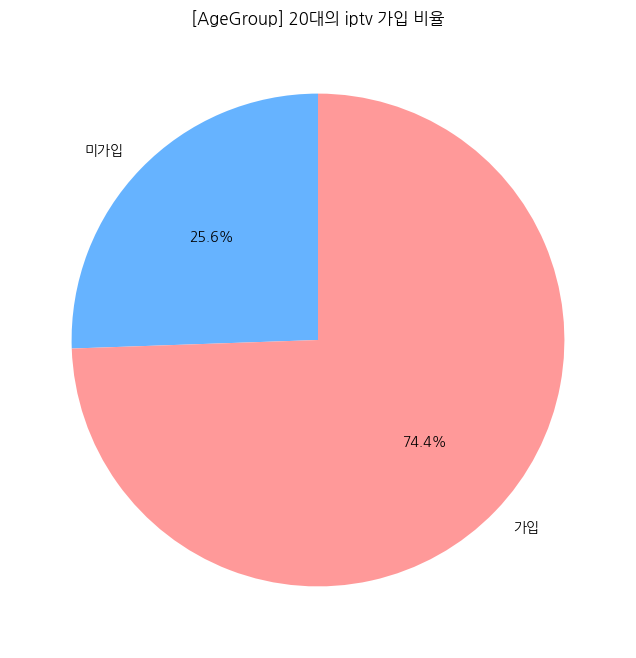

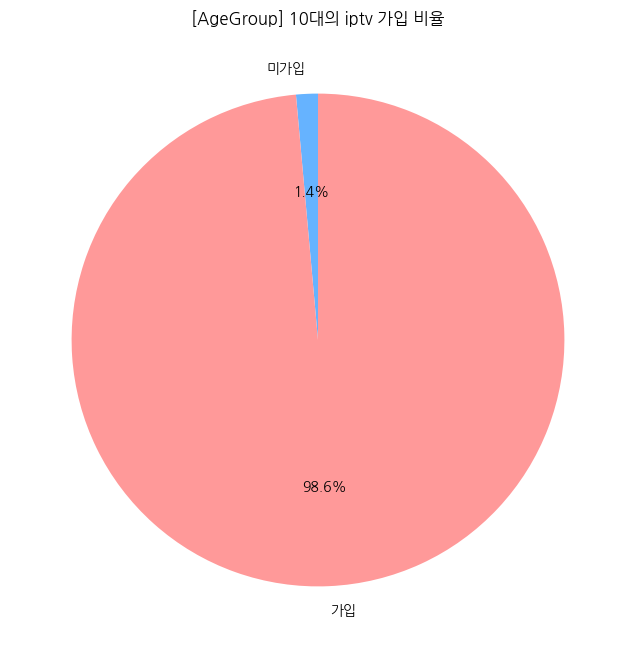

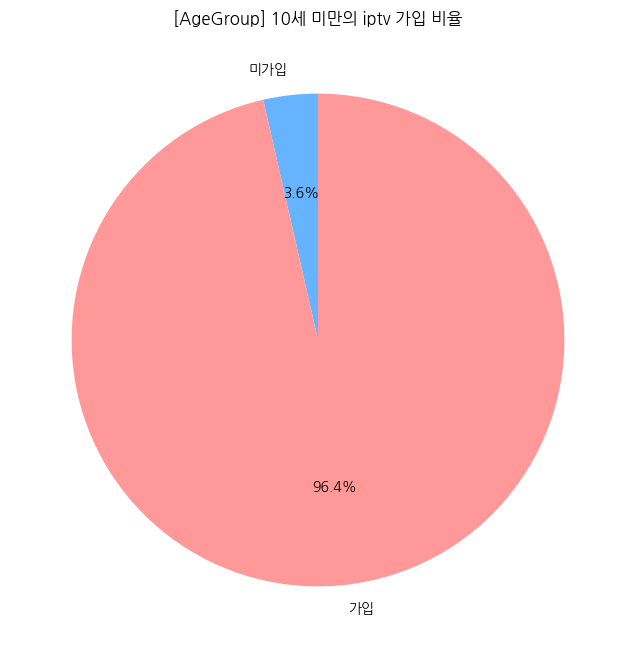

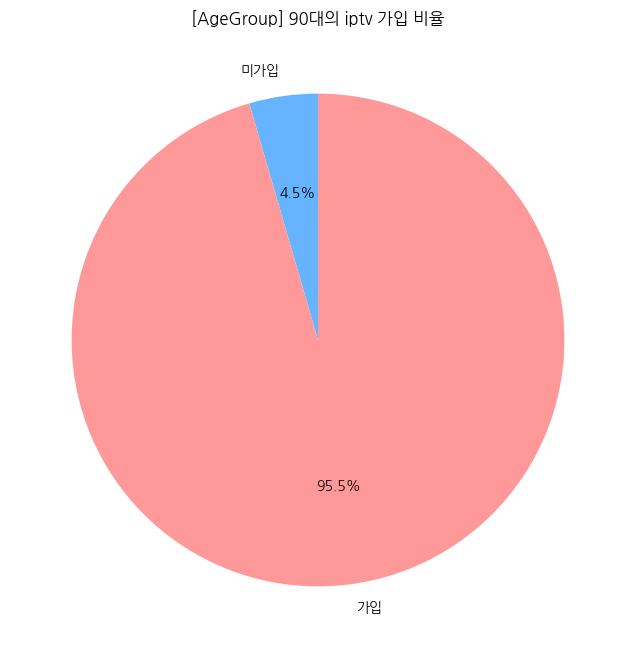

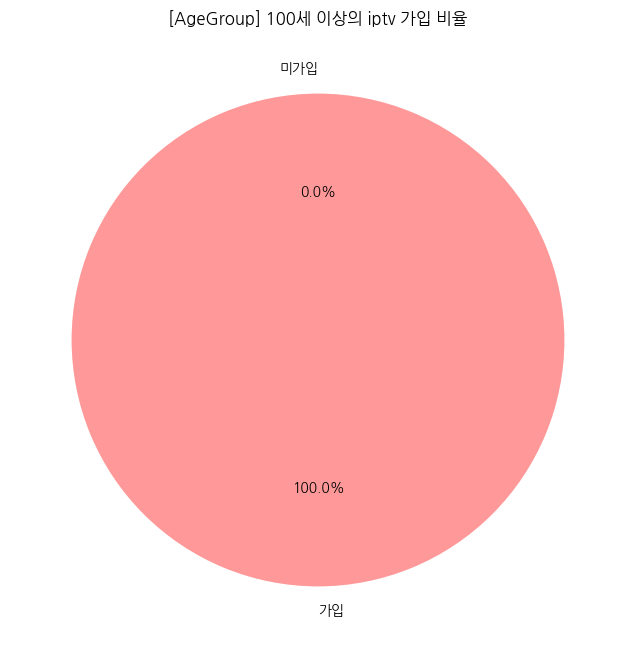

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 'categorical_cols'는 범주형 변수 이름이 저장된 리스트입니다 (예: ['성별', '연령대'])
for col in categorical_cols:
    # 1. 각 범주별 iptv 가입 비율 계산
    df_pct = (
        df.groupby(col)['iptv_yn']
        .value_counts(normalize=True)
        .unstack(fill_value=0)  # NaN을 0으로 대체
        .mul(100)
        .reset_index()
        .melt(id_vars=col, var_name='iptv_yn', value_name='percentage')
    )
    # 2. 각 범주(category)별로 파이 차트 생성
    for category in df[col].dropna().unique():  # NaN 제외
        plt.figure(figsize=(8, 8))
        subset = df_pct[df_pct[col] == category]

        plt.pie(
            subset['percentage'],
            labels=subset['iptv_yn'].map({'Y': '가입', 'N': '미가입'}),
            autopct='%1.1f%%',
            startangle=90,
            colors=['#66b3ff','#ff9999']
        )
        plt.title(f'[{col}] {category}의 iptv 가입 비율')
        plt.show()
